# EMRI Waveforms in a nuthsell

Here you can find a pedagogical tutorial on creating Extreme Mass Ratio Inspiral (EMRI) waveforms. We will make an extensive use of the Fast EMRI Waveform (FEW) package [arxiv.org/2104.04582](https://arxiv.org/abs/2104.04582) [arxiv.org/2008.06071](https://arxiv.org/abs/2008.06071). The waveforms in this package combine a variety of separately accessible modules to form EMRI waveforms on both CPUs and GPUs. Generally, the modules fall into four categories: trajectory, amplitudes, summation, and utilities. Please see the [documentation](https://bhptoolkit.org/FastEMRIWaveforms/) for further information on these modules. The code and installation instructions can be found on Github [here](https://github.com/BlackHolePerturbationToolkit/FastEMRIWaveforms).

In this tutorial will cover the basics of EMRI waveforms. In particular, we will understand:
1) What is an Extreme Mass Ratio Inspiral?
2) How is an EMRI Waveform built? What are the parameters of an EMRI Waveform?
3) EMRI Trajectories
4) EMRI Amplitudes and harmonic content
5) EMRI Waveforms
6) How to modify a trajectory and build your own waveform

## What is an Extreme Mass Ratio Inspiral?

One of the primary sources for the future space-based gravitational wave detector, the Laser Interferometer Space Antenna, are the inspirals of small compact objects into massive black holes in the centers of galaxies. Such binaries are characterized by a small compact object of mass typically $\mu\in[1,100]M_\odot$ (for example a solar-mass black hole or a neutron star) inspiralling around a Massive Black Hole (MBH) of mass $M\in[10^5,10^7]M_\odot$. Due to their particularly small mass ratio $\epsilon = \mu / M \sim [10^{-4},10^{-6}]$ these systems are called Extreme Mass Ratio Inspiral (EMRI). Using perturbation theory in the mass ratio $\epsilon$ it is possible to model the evolution of the orbit of the compact object. 

Below, in the let panel, we show an example of a small compact object of ten solar masses inspiraling around a spinning MBH of $10^6$ solar masses. The duration of the animation corresponds to 8 hours. In the right panel, you can see the gravitational wave signal emmitted during this inspiral.

In [1]:
%%HTML
<video width="420" height="340" controls>
  <source src="EMRI_orbit.mp4" type="video/mp4">
</video>
<video width="420" height="340" controls>
  <source src="EMRI_waveform.mp4" type="video/mp4">
</video>

## EMRI Waveforms

EMRI waveforms are represented by the complex time-domain dimensionless strain $h(t) = h_+ - ih_\times$, where $h_+$ and $h_\times$ are the normal transverse-traceless gravitational wave polarizations. At a large distance from the source, $h$ is given by [Drasco and Hughes 2006](https://arxiv.org/abs/gr-qc/0509101):
\begin{equation}\label{eq:main_wave}
    h = \frac{\mu}{d_L}\sum_{lmkn} A_{lmkn}(t) \, S_{lmkn}(\theta,\phi) \, \exp[-i\Phi_{mkn}(t)],
\end{equation}
where $t$ is the time of arrival of the gravitational wave at the solar system baricenter, $d_L$ is the luminosity distance, and $(l,m,k,n)$ are the indices describing the frequency-domain harmonic mode decomposition (or simply "harmonic" or "mode"):

- $l$ denotes the orbital angular momentum mode index and can take the value $l=2,3,...$

- $m$ denotes the azimuthal mode index and can take the values from $-l$ up to $l$. For example for l=2, $m=-2, -1, 0, 1, 2$.

- $k$ and $n$ denote the polar and radial mode indices and can take values from $-\infty$ up to $+\infty$. But in practice they are restriced to values around zero, for instance between $-30$ up to $30$

For LIGO sources, where the two objects have comparable masses, the strongest mode is the $(l=2,m=2,k=0,n=0)$.

Each harmonics is characterized by three important functions (these will be also different modules in the code):

1. The oscillatory part $\exp[-i\Phi_{mkn}(t)]$ is determined byt the phase $\Phi_{mkn}=m\Phi_\varphi + k \Phi_\theta + n\Phi_r$. The phases $\Phi_{\varphi,\theta,r}$ are determined solving for the EMRI trajectory, i.e. the following system of ordinary differential equations:
\begin{align}
    \frac{d}{dt}p &= \epsilon \, f_p(p, e, x_I) \\
    \frac{d}{dt}e &= \epsilon \, f_e(p, e, x_I) \\
    \frac{d}{dt}x_I &= \epsilon \, f_{x_I}(p, e, x_I) \\
    \frac{d}{dt}\Phi_{\varphi,\theta,r} &= \Omega_{\varphi, \theta, r}(p, e, x_I) 
\end{align}
with initial condition $\{\Phi_{\varphi0},\Phi_{\theta0},\Phi_{r0},p_0,e_0,x_{I0}\}$. The frequencies $\Omega_{r,\theta,\phi}$ describe the fundamental frequencies of a Kerr geodesic orbit and in the Newtonian limit they all converge to the Keplerian frequency. These frequencies are determined using the dimensionless spin of the MBH, $a$, and the quasi-Keplerian orbital parameters of $p$ (semi-latus rectum; hereafter separation), $e$ (eccentricity), and $\cos{I} \equiv x_I$ (cosine of the angle $I$ which describes the orbit's inclination from the equatorial plane). The rate of change of $p,e,x_I$ (left hand side of the first 3 equations) is obtained using the orbital-element fluxes $f_{p,e,x_I}$, which account for the gravitational wave emission, and the mass ratio $\epsilon = \mu/M$. For $\epsilon \rightarrow 0$ we reach the test-particle limit, and the orbital elements do not vay over time.


2. The amplitude $A_{lmkn}(t)$ which quantifies the size of each harmonic $(l,m,k,n)$. These are determined using the orbital parameters $A_{lmkn}(p(t), e(t), x_I(t))$.

![amplitude.pdf](amplitude.pdf)



3. The angular function $S_{lmkn}(\theta,\phi)$ which describes how the amplitude is modulated depending on the source-frame polar viewing angle $\theta$, the source-frame azimuthal viewing angle $\phi$. For Schwarzchild black holes these functions reduce to the spherical harmonics $Y_{lm}$.

### General Remarks
Notice the correspondence of the mode index with the three different degrees of freedom: $m\rightarrow \varphi$ (azimuthal), $k\rightarrow \theta$ (polar), $n\rightarrow r$ (radial). Each mode (or harmonic) is characterized by the mode frequency $\omega_{mkn}=m\Omega_\varphi + k \Omega_\theta + n \Omega_r$ which is the derivative of the phase $\Phi_{mkn}$. 

Theoretical parameter ranges:
- the eccentricity ranges between 0 and 1, for $e=0$ the orbits are circular;
- the inclination parameter ranges between -1 and 1, for $x_I=1$ the orbits are equatorial prograde, $x_I=-1$ the orbits are equatorial retrograde, $x_I=0$ the orbits are polar;
- the dimensionless spin parameters ranges between 0 and 1, for $a=0$ the central MBH is not spinning (Schwarzchild background) and the orbit of the compact object stays in the same plane, i.e. $x_I$ is constant.

See [Hughes2021](https://ui.adsabs.harvard.edu/abs/2021PhRvD.103j4014H/abstract) for further discussion and more detailed definitions.  

## EMRI Parameter space

After we outlined the building blocks to create an EMRI waveform, let us now understand how these are organized in the Fast EMRI Waveform code. The waveform code takes as input two sets of parameters:
- the intrinsic parameters $(M,\mu,a,p_0,e_0,x_0,\Phi_{\varphi 0},\Phi_{\theta 0},\Phi_{r 0})$, which are used to construct the waveform in the source frame;
- the extrinsic parameters $(d_L,\theta_S,\phi_S,\theta_K,\phi_K)$, which define how the waveform is viewed in a given reference frame.

The intrinsic parameters are then passed into the trajectory module which computes the sparse time evolution of the phases $\Phi_{\varphi}(t),\Phi_{\theta}(t),\Phi_{r}(t)$ and orbital elements $p(t),e(t),x_I(t)$. The phases are used to assemble the oscillatory part, whereas the orbital elements are passed to the amplitude module which computes $A(p(t),e(t),x_I(t))$. The angular function is computed using the extrinsic parameters. Then the summation module (Waveform build) takes as input the functions $\exp[-i\Phi_{mkn}(t)], A_{lmkn}(t)$ and $S_{lmkn}(\theta,\phi)$ and outputs the waveform strain $h$.

![FEW_arch.pdf](FEW_arch.pdf)

In [2]:
# we import here all the modules and packages we need
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.waveform import SchwarzschildEccentricWaveformBase
from few.summation.interpolatedmodesum import InterpolatedModeSum
from few.summation.directmodesum import DirectModeSum
from few.utils.constants import *
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase

use_gpu = False

# keyword arguments for inspiral generator (RunSchwarzEccFluxInspiral)
inspiral_kwargs={
        "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
        "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    }

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    "use_gpu": use_gpu  # GPU is available in this class
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
    "assume_positive_m": False  # if we assume positive m, it will generate negative m for all m>0
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

## Schwarzschild Eccentric Waveforms

## Trajectory Module
The trajectory module generates orbital and phase trajectories for an EMRI orbit:  

\begin{equation}
p(t), e(t), x_I(t), \Phi_\varphi(t), \Phi_\theta(t), \Phi_r(t)
\end{equation}

with inputs $M, \mu, p_0, e_0, \iota_0, \Phi_{\varphi0}, \Phi_{\theta0}, \Phi_{r 0}$. The trajectory is evolved for `T` years. If the specified duration is longer than the trajectory, the trajectory is generated until the last stable orbit, also called separatrix.

$M$ is the larger mass ($M_\odot$), $\mu$ is the compact object mass ($M_\odot$), $p_0$ is the initial semi-latus rectum (dimensionless), $e_0$ is the initial eccentricity, and the final three are the initial phases $\Phi_{\varphi 0}, \Phi_{\theta 0}, \Phi_{r 0}$. For Schwarzchild black holes the spin parameter is zero $a=0$, the orbit remains in the same plane $x_I=1$, and the separatrix is located at $p_\textrm{sep} = 6+2e$.

### Run a basic trajectory

In [3]:
# initialize trajectory class
traj = EMRIInspiral(func="SchwarzEccFlux")

In [4]:
# set initial parameters
M = 1e6
mu = 1e1
p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0

# additional information 

kwargs = dict(dt=10.0, # initial time setp, 
              T=4.0, # Time duration in years
              err=1e-10 # integrator error
             )

t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)

# get adimensional fundamental frequencies
OmegaPhi, OmegaTheta, OmegaR = get_fundamental_frequencies(a, p, e, x)

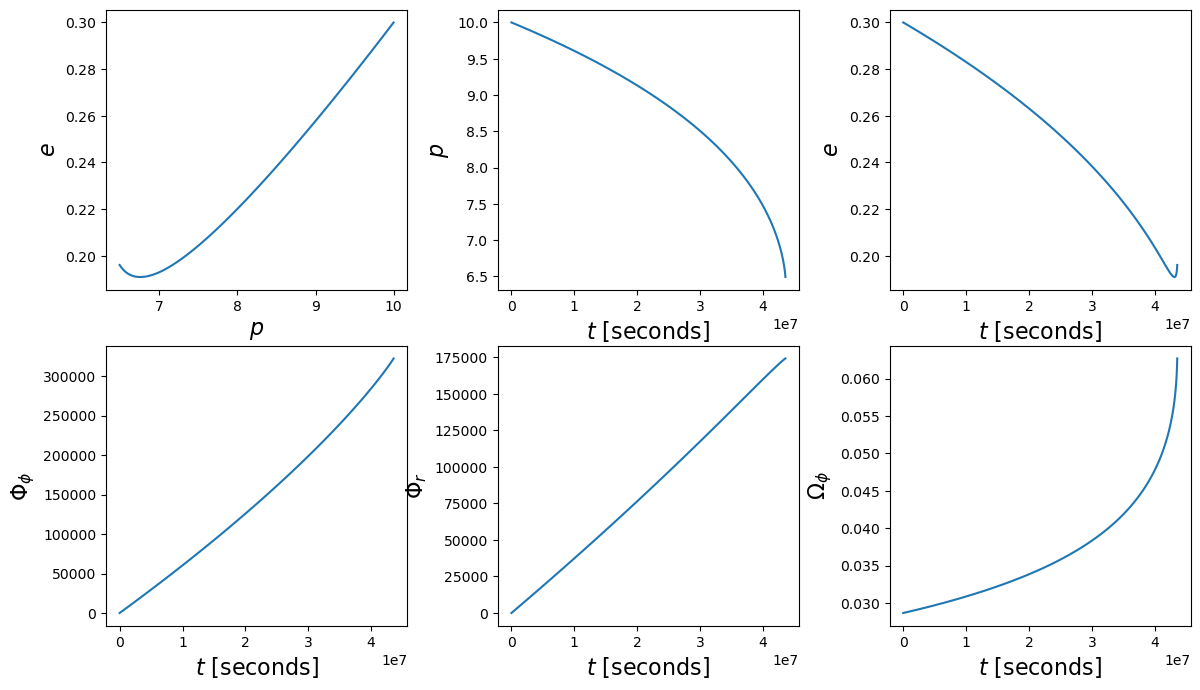

In [5]:
fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.3)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r'$e$', r'$p$', r'$e$', r'$\Phi_\phi$', r'$\Phi_r$', r'$\Omega_\phi$']
xlabels = [r'$p$', r'$t$ [seconds]', r'$t$ [seconds]', r'$t$ [seconds]', r'$t$ [seconds]', r'$t$ [seconds]', r'$t$ [seconds]', r'$t$ [seconds]']
ys = [e, p, e, Phi_phi, Phi_r, OmegaPhi]
xs = [p, t, t, t, t, t]

for i, (ax, x, y, xlab, ylab) in enumerate(zip(axes, xs, ys, xlabels, ylabels)):
    ax.plot(x, y)
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)

### Understanding initial conditions

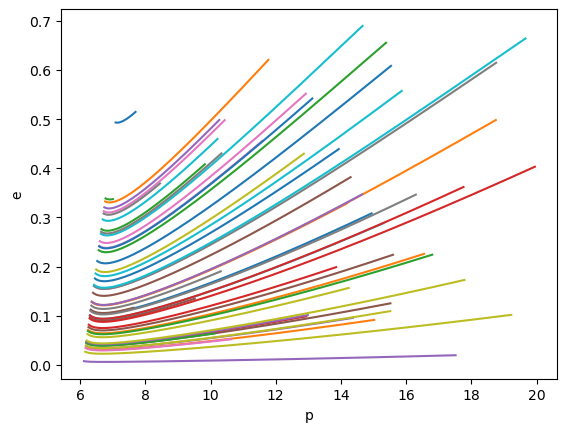

In [6]:
# set initial parameters
M = 1e6
mu = 1e1

# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0

# additional information 

kwargs = dict(dt=10.0, # initial time setp, 
              T=400.0, # Time duration in years
              err=1e-10 # integrator error
             )

p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

plt.figure()
for _ in range(50):
    p0 = np.random.uniform(7, 20)
    e0 = np.random.uniform(0.0, 0.69)
    t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                                  Phi_phi0=0.0,
                                                  Phi_theta0=0.0,
                                                  Phi_r0=0.0,
                                                  **kwargs)
    plt.plot(p,e)

plt.xlabel('p')
plt.ylabel('e')
plt.show()


### Trajectory duration as a function of mass ratio, eccentricity, semi-latus rectum

In [7]:
# set initial parameters
M = 1e6
mu = 1e1
p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0


# Fix time duration to a very large number (100 years) so that we obtain the time duration from trajectory
kwargs = dict(dt=10.0, # initial time setp, 
              T=1000.0,
              err=1e-10 # integrator error
             )

mass_ratio_vector = 10**np.linspace(-4.0, -6.0, num=10)

tfinal = []
for epsilon in mass_ratio_vector:

    # get secondary mass for fixed mass ratio
    mu = M * epsilon
    t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                                  Phi_phi0=0.0,
                                                  Phi_theta0=0.0,
                                                  Phi_r0=0.0,
                                                  **kwargs)
    
    # inspiral duration (divide by YRSID_SI to get it in years)
    tfinal.append(t[-1]/YRSID_SI) 


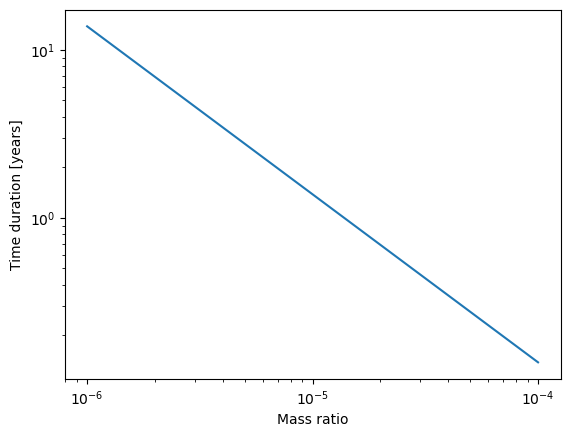

In [8]:
plt.figure()
plt.loglog(mass_ratio_vector, tfinal) 
plt.ylabel('Time duration [years]')
plt.xlabel('Mass ratio')
plt.show()

## Exercise 1

Let us now understand how the inspiral duration changes for different initial eccentricity or different initial semi-latus rectum. Remember the range of validity of the parameters and produce two plots:
- Time duration vs initial eccentricity (fixing all the other parameters)
- Time duration vs initial semi-latus rectum (fixing all the other parameters)

If you have time, produce also this plot:
- Time duration vs M/epsilon (M=Mass MBHS and epsilon=Mass ratio). Prove that for different total masses and mass ratios the behavior of Time duration vs M/epsilon is always the same (Hint: use two for loops).

In [9]:
# It is your turn now ;)


### Number of cycles and differences between trajectories
In the field of gravitational wave it is often useful to introduce the number of cycles $\mathcal{N}_\varphi (t)= \Phi_\varphi(t)/(2\pi)$ to quantify the number of times the compact object orbits aroun the MBH. This concept is useful to quantify the difference between trajectories.

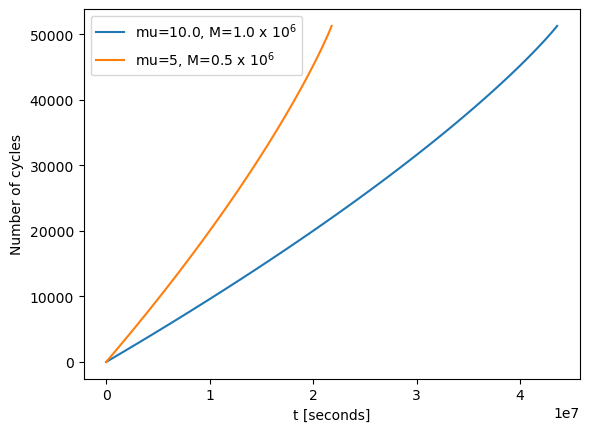

In [10]:
# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0
p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

# set initial parameters
M = 1e6
mu = 1e1

t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)

M2 = 5e5
mu2 = 5
t2, p2, e2, xI2, Phi_phi2, Phi_theta2, Phi_r2 = traj(M2, mu2, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)

plt.figure()
plt.plot(t,Phi_phi/(2*np.pi), label=f'mu={mu}, M={M/1e6} x $10^6$') 
plt.plot(t2,Phi_phi2/(2*np.pi), label=f'mu={mu2}, M={M2/1e6} x $10^6$')
plt.ylabel('Number of cycles')
plt.xlabel('t [seconds]')
plt.legend()
plt.show()

The two systems have the same mass ratio and the same final number of cycles. However, the number of cycles accumulated per second is different. Notice that the frequencies are related to the time derivative of the number of cycles
$$
\frac{d}{dt} \mathcal{N}_\varphi = \frac{1}{2 \pi}\frac{d}{dt} \Phi_\varphi = \frac{1}{2 \pi} \Omega_\varphi
$$

## Exercise 2
Plot the FINAL number of cycles (`Ncycle.append(Phi_phi[-1]/(2*np.pi))`) for different mass ratios.

In [ ]:
# your turn ;)

### Fundamental frequencies and harmonics

An EMRI Waveform can thought as a Fourier series where the frequencies $\omega_{mnk}$ are given by
$$
\omega_{mnk} = m \Omega_\varphi + n \Omega_r + k \Omega_\theta
$$
Therefore is possible to plot the frequency evolution given a trajectory. Remember this when you will see how an EMRI waveform look like in time frequency domain

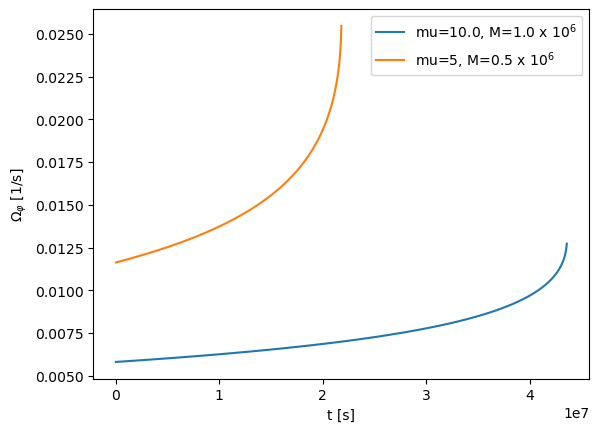

In [12]:
# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0
p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

# set initial parameters
M = 1e6
mu = 1e1

t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)
OmegaPhi, OmegaTheta, OmegaR = get_fundamental_frequencies(a, p, e, x)

M2 = 5e5
mu2 = 5
t2, p2, e2, xI2, Phi_phi2, Phi_theta2, Phi_r2 = traj(M2, mu2, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)
OmegaPhi2, OmegaTheta2, OmegaR2 = get_fundamental_frequencies(a, p2, e2, x)

plt.figure()
# we need to divide by the total Mass and convert to seconds
plt.plot(t,OmegaPhi / (M * MTSUN_SI) , label=f'mu={mu}, M={M/1e6} x $10^6$') 
plt.plot(t2,OmegaPhi2/ (M2 * MTSUN_SI), label=f'mu={mu2}, M={M2/1e6} x $10^6$')
plt.ylabel(r'$\Omega_\varphi$ [1/s]')
plt.xlabel('t [s]')
plt.legend()
plt.show()

## Exercise 3

Make the following plots
- `OmegaPhi /OmegaR` as a function of time for different values of `e0`
- `OmegaPhi /OmegaTheta` as a function of time for different values of `e0`

## Amplitude Module

The amplitude module generates the complex mode amplitudes for each harmonic mode requested, $A_{lmkn}(t)$ ($k=0$ for equatorial orbits). With Schwarzschild eccentric amplitudes, the user provides $p$ and $e$ as arrays and is returned the requested Teukolsky modes in a 2D array of shape (trajectory length, number of modes). 

In [13]:
# There are two different modules to get the amplitudes
# amp = RomanAmplitude(max_init_len=5000)
amp = Interp2DAmplitude()

Text(0, 0.5, 'e')

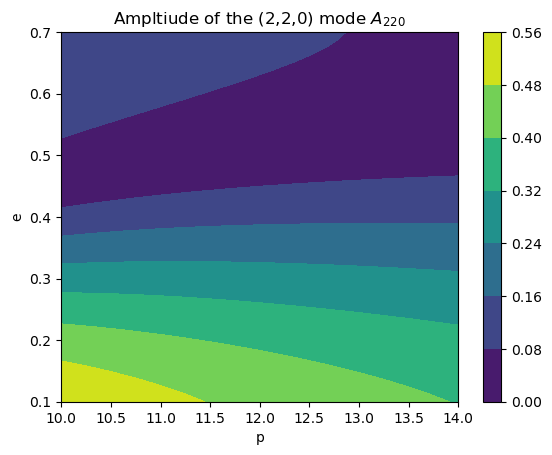

In [14]:
p = np.linspace(10.0, 14.0)
e = np.linspace(0.1, 0.7)

p_all, e_all = np.asarray([temp.ravel() for temp in np.meshgrid(p, e)])

teuk_modes = amp(p_all, e_all)

# look at the contours of the (2,2,0) mode
plt.figure()
plt.title('Ampltiude of the (2,2,0) mode $A_{220}$')
cb = plt.contourf(p, e, np.abs(teuk_modes[:, amp.special_index_map[(2,2,0)]].reshape(len(p), len(e))))
plt.colorbar(cb)
plt.xlabel('p')
plt.ylabel('e')

Specific modes can be selected by providing a list of tuple of (l,m,n) values as the `specific_modes` kwarg:

Indices of interest: [ 640 1922]
True
True


Text(0, 0.5, 'e')

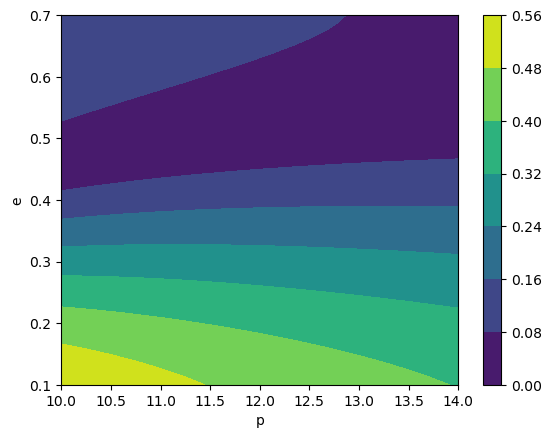

In [15]:
# (2, 2, 0) and (7, -3, 1) modes
specific_modes = [(2, 2, 0), (7, -3, 1)]

# notice this returns a dictionary with keys as the mode tuple and values as the mode values at all trajectory points
specific_teuk_modes = amp(p_all, e_all, specific_modes=specific_modes)

# we can find the index to these modes to check
inds = np.array([amp.special_index_map[lmn] for lmn in specific_modes])
print('Indices of interest:', inds)

# make sure they are the same
print(np.allclose(specific_teuk_modes[(2, 2, 0)], teuk_modes[:, inds[0]]))

# to check -m modes we need to take the conjugate
print(np.allclose(specific_teuk_modes[(7, -3, 1)], np.conj(teuk_modes[:, inds[1]])))

# look at the contours of the (220)mode
cb = plt.contourf(p, e, np.abs(specific_teuk_modes[(2, 2, 0)].reshape(len(p), len(e))))
plt.colorbar(cb)
plt.xlabel('p')
plt.ylabel('e')

### Amplitude evolution over the trajectory

In [16]:
# first, lets get amplitudes for a trajectory
traj = EMRIInspiral(func="SchwarzEccFlux")

# parameters
M = 1e6
mu = 1e1
p0 = 10.0
e0 = 0.3
theta = np.pi/3.
phi = np.pi/2.

t, p, e, x, Phi_phi, Phi_theta, Phi_r = traj(M, mu, 0.0, p0, e0, 1.0, T=4.0)

# get amplitudes along trajectory
amp = RomanAmplitude()

teuk_modes = amp(p, e)

In [17]:
teuk_modes[:, amp.special_index_map[(2,2,2)]][0]

(0.20720695817714077-0.06638275792449425j)

In [18]:
teuk_modes[:, amp.special_index_map[(2,-2,-2)]][0]

(0.034053830695681235-0.004293870344914924j)

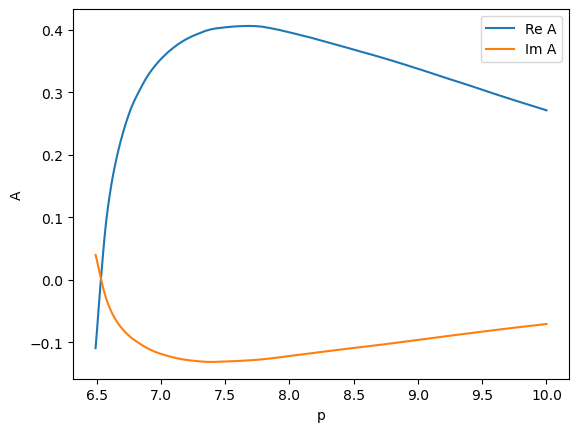

In [19]:
plt.figure()
plt.plot(p, teuk_modes[:, amp.special_index_map[(2,2,0)]].real, label='Re A')
plt.plot(p, teuk_modes[:, amp.special_index_map[(2,2,0)]].imag, label='Im A')
plt.ylabel('A')
plt.xlabel('p')
plt.legend()
plt.show()

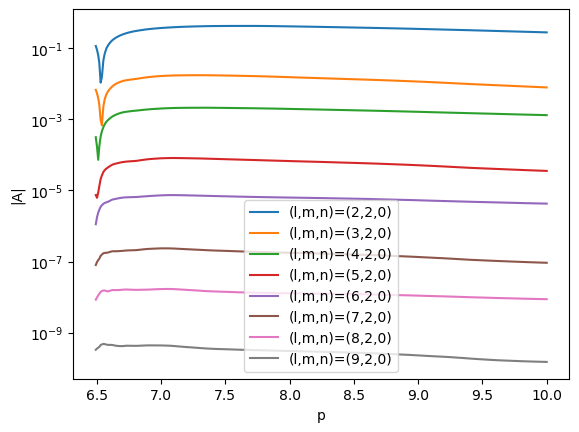

In [20]:
plt.figure()
for ll in range(2,10):
    mm=2
    nn=0
    plt.semilogy(p, np.abs(teuk_modes[:, amp.special_index_map[(ll,mm,nn)]]),label=f'(l,m,n)=({ll},{mm},{nn})')

plt.ylabel('|A|')
plt.xlabel('p')
plt.legend()
plt.show()

## Exercise 4

- repeat the previous plot for l=5, n=0 for different m values [-l,l]
- repeat the previous plot for l=2, m=2 for different n values [-3,3]

## Amplitude and frequency all together

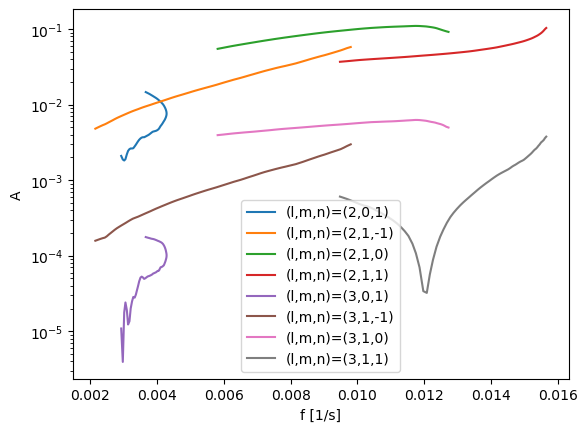

In [21]:
# parameters
M = 1e6
mu = 1e1
p0 = 10.0
e0 = 0.3
theta = np.pi/3.
phi = np.pi/2.

t, p, e, x, Phi_phi, Phi_theta, Phi_r = traj(M, mu, 0.0, p0, e0, 1.0, T=4.0)
OmegaPhi, OmegaTheta, OmegaR = get_fundamental_frequencies(a, p, e, x)

# get amplitudes along trajectory
amp = RomanAmplitude()

teuk_modes = amp(p, e)


plt.figure()

for ll in range(2,4):
    for mm in np.arange(-1,2):
        for nn in range(-1,2):

            A = np.abs(teuk_modes[:, amp.special_index_map[(ll,mm,nn)]])

            frequency_harmonic = (mm * OmegaPhi + nn* OmegaR)/(M*MTSUN_SI)
            if np.all(frequency_harmonic>0.0):
                plt.semilogy(frequency_harmonic, A,label=f'(l,m,n)=({ll},{mm},{nn})')
plt.ylabel('A')
plt.xlabel('f [1/s]')
plt.legend()
plt.show()

## Spin-weighted spherical harmonics

In [22]:
few = FastSchwarzschildEccentricFlux()  # get mode information

ylm_gen = GetYlms(assume_positive_m=False, use_gpu=False)

ls = np.array([2, 3, 4, 5])
ms = np.array([2, 2, 3, 3])

# viewing angles
theta = np.pi/3
phi = np.pi/4

print(ylm_gen(ls, ms, theta, phi))

[ 2.17261840e-17+3.54815511e-01j -1.28533838e-17-2.09911687e-01j
  1.24292687e-16-1.24292687e-16j -2.46692086e-01+2.46692086e-01j]


If we assume positive m, it will return -m entries for all +m. The last 5 below are for -m. The final shape will be twice the initial length and will duplicate m=0 so be careful.

In [23]:
ylm_gen = GetYlms(assume_positive_m=True, use_gpu=False)

ls = np.array([2, 3, 4, 5, 2])
ms = np.array([2, 2, 3, 3, 0])

# viewing angles
theta = np.pi/3
phi = np.pi/4

ylms = ylm_gen(ls, ms, theta, phi)

for l, m, ylm in zip(ls, ms, ylms[:5]):
    print('({},{}):'.format(l, m), ylm)
    
for l, m, ylm in zip(ls, ms, ylms[5:]):
    print('({},-{}):'.format(l, m), ylm)

(2,2): (2.1726183986132194e-17+0.35481551090908514j)
(3,2): (-1.2853383784425917e-17-0.2099116870819398j)
(4,3): (1.242926870060164e-16-1.2429268700601641e-16j)
(5,3): (-0.24669208642519044+0.2466920864251905j)
(2,0): (0.2897056515173922+0j)
(2,-2): (2.4140204429035754e-18-0.039423945656564985j)
(3,-2): (-9.997076276775717e-18+0.16326464550817543j)
(4,-3): (-0.12119256904280647-0.12119256904280648j)
(5,-3): (0.2357279936951819+0.23572799369518194j)
(2,-0): (0.2897056515173922+0j)


# Putting all together! Generate the EMRI Waveform

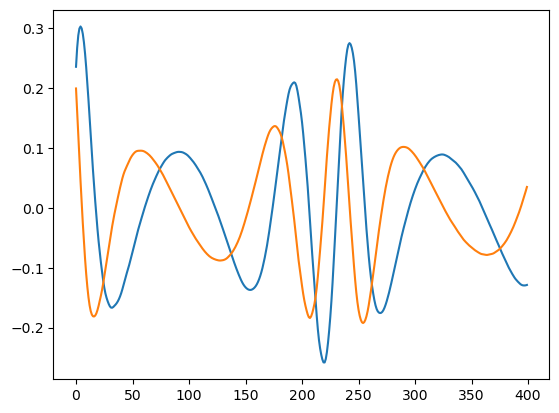

In [24]:
M = 1e6
mu = 1e1
p0 = 12.0
e0 = 0.4
theta = np.pi/3  # polar viewing angle in source frame
phi = np.pi/4  # azimuthal viewing angle in source frame
T = 0.001
dt = 10.0
Tsec = T * YRSID_SI

traj = EMRIInspiral(func="SchwarzEccFlux") # class the calculates the trajectory
amp = RomanAmplitude() # class that calculates the amplitudes
ylm_gen = GetYlms(assume_positive_m=False) # class providing the angular function
interpolate_mode_sum = InterpolatedModeSum() # class that sums over the modes

# get trajectory
(t, p, e, x, Phi_phi, Phi_theta, Phi_r) = traj(M, mu, 0.0, p0, e0, 1.0, T=T, dt=dt)

ylms = ylm_gen(amp.unique_l, amp.unique_m, theta, phi).copy()[
    amp.inverse_lm
]

# amplitudes
teuk_modes = amp(p, e, amp.l_arr, amp.m_arr, amp.n_arr)

# need to prepare arrays for sum with all modes due to +/- m setup
ls = amp.l_arr[: teuk_modes.shape[1]]
ms = amp.m_arr[: teuk_modes.shape[1]]
ns = amp.n_arr[: teuk_modes.shape[1]]

keep_modes = np.arange(teuk_modes.shape[1])
temp2 = keep_modes * (keep_modes < amp.num_m0) + (
    keep_modes + amp.num_m_1_up
) * (keep_modes >= amp.num_m0)

ylmkeep = np.concatenate([keep_modes, temp2])
ylms_in = ylms[ylmkeep]
teuk_modes_in = teuk_modes

# summation
waveform1 = interpolate_mode_sum(t, teuk_modes_in, ylms_in, Phi_phi, Phi_r, amp.m_arr, amp.n_arr, dt=dt, T=T)

plt.plot(waveform1.real[:400])
plt.plot(waveform1.imag[:400])

## Schwarzchild Waveforms in the source frame

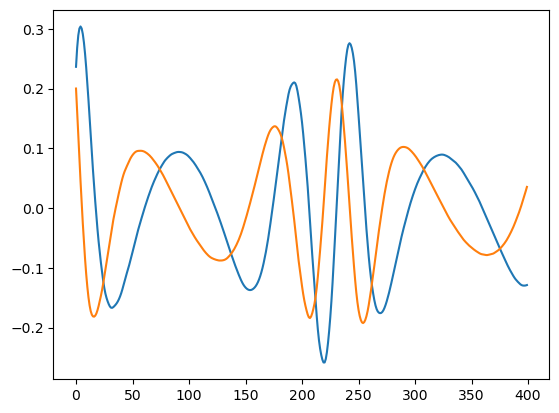

In [25]:
few_gen = FastSchwarzschildEccentricFlux(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs,
    use_gpu=use_gpu,
)

# parameters
M = 1e6
mu = 1e2
p0 = 12.0
e0 = 0.4
theta = np.pi/3  # polar viewing angle in source frame
phi = np.pi/4  # azimuthal viewing angle in source frame
dt = 10.0

wave = few_gen(M, mu, p0, e0, theta, phi, dt=dt, T=1.0)  #  assumes dt = 10.0 for max T = 1.0 year

plt.figure()
plt.plot(wave.real[:400])
plt.plot(wave.imag[:400])
plt.show()

## Understanding the EMRI Waveforms

In [26]:
time = np.arange(0, len(wave))*dt

wave = few_gen(M, mu, p0, e0, theta, phi, dist=1.0, dt=dt, T=1.0)  #  assumes dt = 10.0 for max T = 1.0 year

## Time Domain

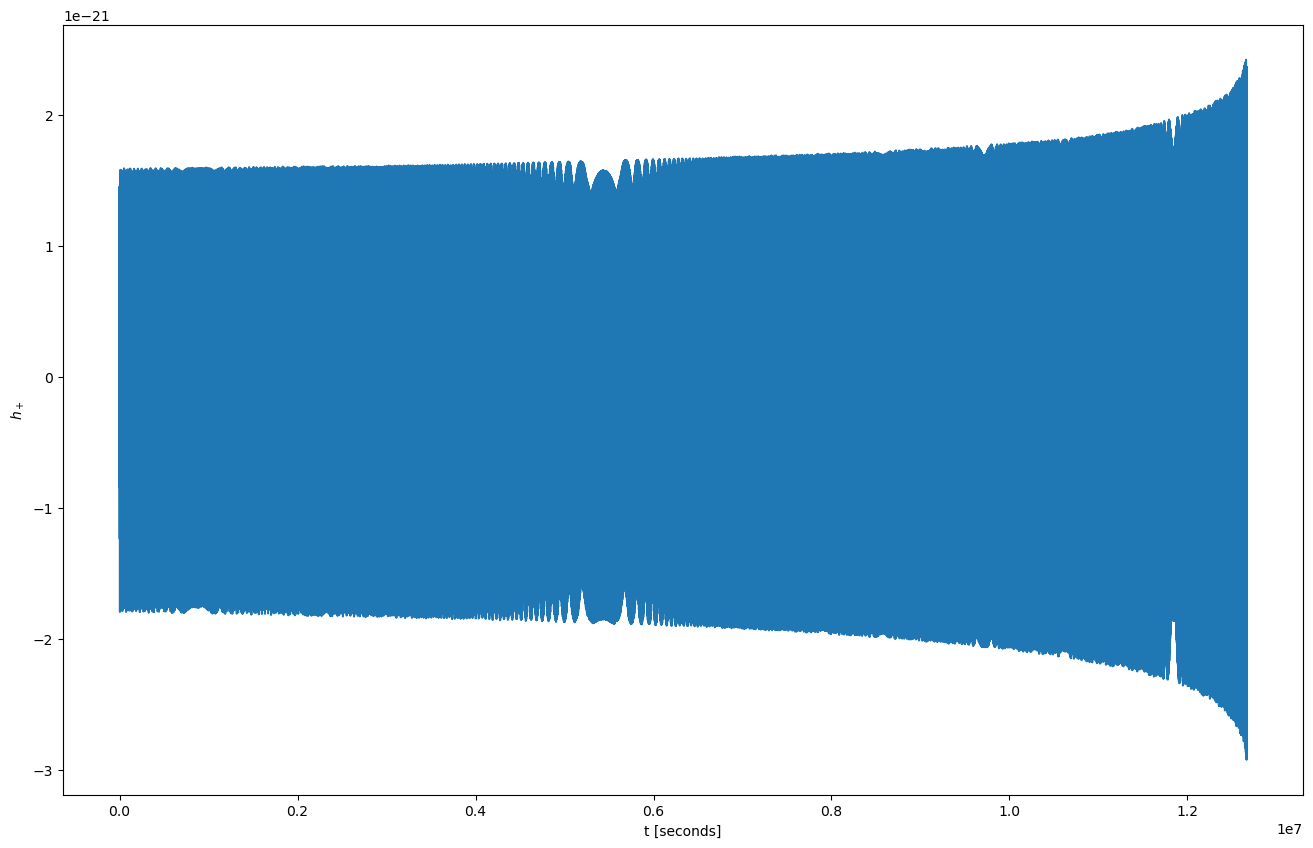

In [27]:
plt.figure(figsize=(16,10))
plt.plot(time, wave.real)
plt.ylabel(r'$h_+$')
plt.xlabel('t [seconds]')
plt.show()

## Fourier Domain

In [28]:
# load lisa PSD
noise = np.genfromtxt("LPA.txt", names=True)
f, PSD = (
    np.asarray(noise["f"], dtype=np.float64),
    np.asarray(noise["ASD"], dtype=np.float64) ** 2,
)

sens_fn = CubicSplineInterpolant(f, PSD, use_gpu=False)


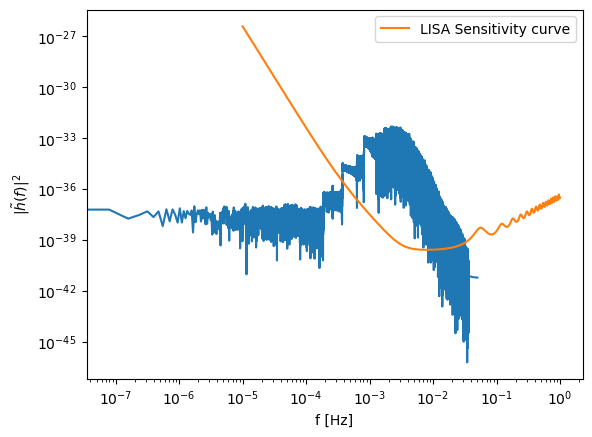

In [29]:
dt=10.0

hp_fft = np.fft.rfft(wave.real)*dt
hx_fft = -np.fft.rfft(wave.imag)*dt

freq = np.fft.rfftfreq(len(wave),dt)
plt.figure()
plt.loglog(freq, np.abs(hx_fft)**2)
plt.plot(f, PSD,label='LISA Sensitivity curve')
plt.legend()
plt.ylabel(r'$|\tilde{h}(f)|^2$')
plt.xlabel('f [Hz]')
plt.show()

## Time-Frequency Domain

In [30]:
from scipy import signal
# short fourier transform of the signal
f, t, Zxx = signal.stft(wave.real, 1/dt, nperseg=5000)

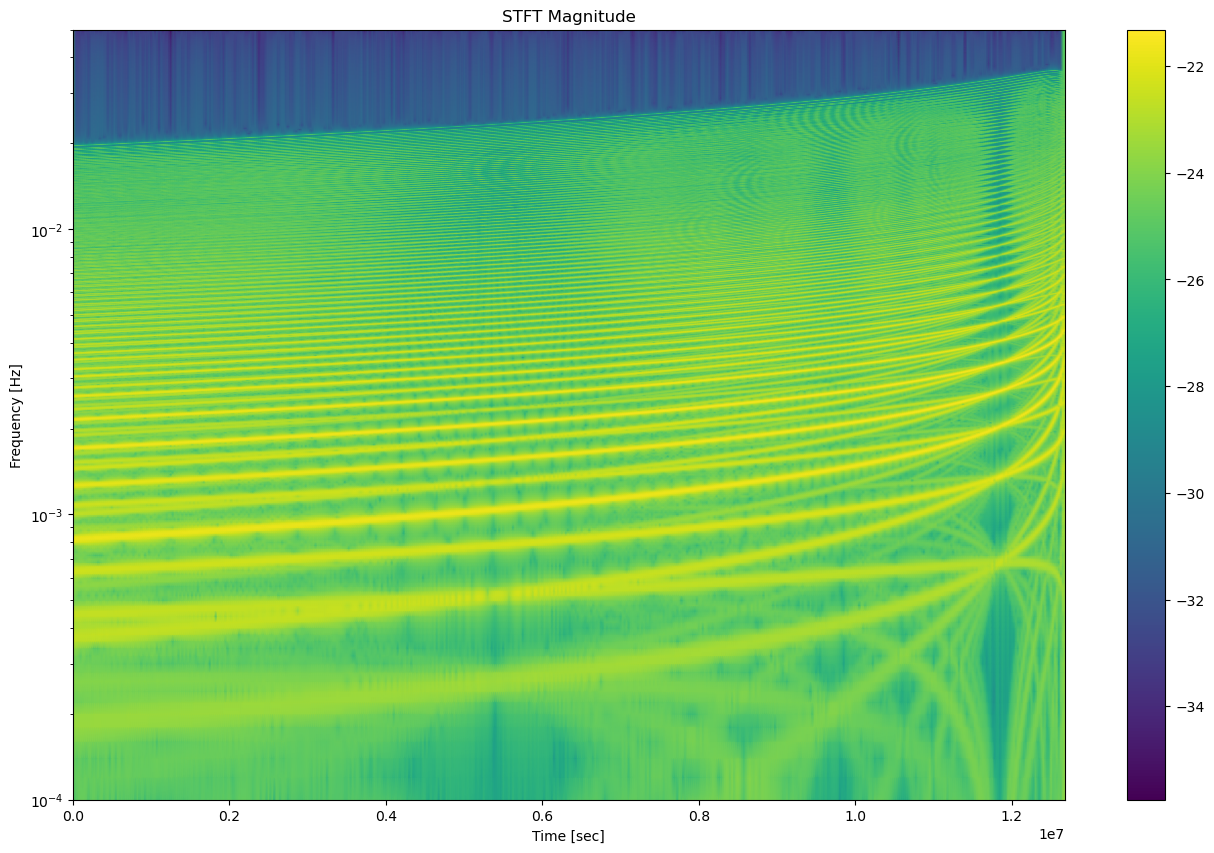

In [31]:
plt.figure(figsize=(16,10))
cb = plt.pcolormesh(t, f, np.log10(np.abs(Zxx)), shading='gouraud')
plt.colorbar(cb,)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
plt.ylim([1e-4, f[-1]])
plt.show()

# Creating  modules

In addition to using our built-in modules and waveforms, you can easily create your own module or waveform. Below is an example of creating your own trajectory module and using it in a custom waveform. If you can get a reasonably fast trajectory from your specific brand of EMRI physics, you can be generating waveforms in no time! Please see the [documentation](https://mikekatz04.github.io/FastEMRIWaveforms/) on this for more details on the constructions behind this. 

**Important Note**: If you do use this package to examine EMRI analysis problems, please contact the authors of this code (see docs) about possible collaboration and/or contribution.

### Post-Newtonian trajectory

The example will be to implement a Post-Newtonian trajectory in a Schwarzschild eccentric waveform. This will be done purely in Python. However, most of our modules have backends in C/C++/CUDA for maximum efficiency. If you have a trajectory in python and want to see if it can be ported for speed, please contact the authors.

To get started, we will import an integrator ([DOP853](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.DOP853.html#scipy.integrate.DOP853)) and a library for elliptical integrals that mirrors the mathematica format `mpmath`. You can run: 

```
pip install mpmath
```

in your conda environment to attain that library. 

We will also import necessary things from our package. This includes constants from `few.utils.constants`, as well as two base classes to be inherited by the new module. 

The first base class is [SchwarzschildEccentric](https://mikekatz04.github.io/FastEMRIWaveforms/html/user/main.html#few.utils.baseclasses.SchwarzschildEccentric) base class that passes information specific to any Schwarzschild eccentric waveform (number of modes, (l,m,n) sets, etc.). It also has methods for general sanity checks in these limits for input parameters, trajectories, and other things. You can see the documentation for more detail on its properties. 

The other base class is [TrajectoryBase](file:///Users/michaelkatz/Research/FastEMRIWaveforms/docs/html/user/traj.html#few.utils.baseclasses.TrajectoryBase). This houses both information for trajectory modules, as well as the interface that should be common to all trajectory modules (i.e. [__call__](https://mikekatz04.github.io/FastEMRIWaveforms/html/user/traj.html?highlight=trajectorybase#few.utils.baseclasses.TrajectoryBase.__call__) function). It allows for flexible parameter calling interfaces, but ensures the strict interface will be the same for all trajectory modules. Trajectory modules must implement the method [get_inspial](https://mikekatz04.github.io/FastEMRIWaveforms/html/user/traj.html?highlight=trajectorybase#few.utils.baseclasses.TrajectoryBase.get_inspiral). The common interface uses this to generate the specific trajectory. 

This is a common theme amongst module and waveform creation. The user will take one parent abstract base class related to the waveform limits, domain of validity, and its waveform properties, and one parent abstract based class for the module type (like trajectory or summation). 

In [32]:
!pip install mpmath

In [33]:
# we need to import an integrator and elliptic integrals
from mpmath import *
from scipy.integrate import DOP853

# base classes
from few.utils.baseclasses import TrajectoryBase
from few.utils.baseclasses import SchwarzschildEccentric

# settings for elliptic integrals
mp.dps = 25
mp.pretty = True

# constants from our package
from few.utils.constants import MTSUN_SI, YRSID_SI, Pi

# for common interface with C/mathematica
def Power(x, n):
    return x**n

def Sqrt(x):
    return np.sqrt(x)

# this is class object just to hold epsilon as it steps
# this class is instantiated and then run like the derivative function in the integrator (ex. dydt)
class PN:
    def __init__(self, epsilon, *args):
        self.epsilon = epsilon
        self.par = args[0]

    def __call__(self, t, y):

        # mass ratio
        epsilon = self.epsilon

        # extract the four evolving parameters
        p, e, Phi_phi, Phi_r = y

        
        # guard against bad integration steps
        if e >= 1.0 or e < 1e-6 or p < 6.0 or (p - 6 - 2* e) < 0.1:
            return [0.0, 0.0, 0.0, 0.0]
        

        # perform elliptic calculations
        EllipE = ellipe(4*e/(p-6.0+2*e))
        EllipK = ellipk(4*e/(p-6.0+2*e))
        EllipPi1 = ellippi(16*e/(12.0 + 8*e - 4*e*e - 8*p + p*p), 4*e/(p-6.0+2*e))
        EllipPi2 = ellippi(2*e*(p-4)/((1.0+e)*(p-6.0+2*e)), 4*e/(p-6.0+2*e))

        # Azimuthal frequency
        Omega_phi = (2*Power(p,1.5))/(Sqrt(-4*Power(e,2) + Power(-2 + p,2))*(8 + ((-2*EllipPi2*(6 + 2*e - p)*(3 + Power(e,2) - p)*Power(p,2))/((-1 + e)*Power(1 + e,2)) - (EllipE*(-4 + p)*Power(p,2)*(-6 + 2*e + p))/(-1 + Power(e,2)) +
              (EllipK*Power(p,2)*(28 + 4*Power(e,2) - 12*p + Power(p,2)))/(-1 + Power(e,2)) + (4*(-4 + p)*p*(2*(1 + e)*EllipK + EllipPi2*(-6 - 2*e + p)))/(1 + e) + 2*Power(-4 + p,2)*(EllipK*(-4 + p) + (EllipPi1*p*(-6 - 2*e + p))/(2 + 2*e - p)))/
            (EllipK*Power(-4 + p,2))))

        # Post-Newtonian calculations
        yPN = Power(Omega_phi,2./3.)

        EdotPN = (96 + 292*Power(e,2) + 37*Power(e,4))/(15.*Power(1 - Power(e,2),3.5)) * pow(yPN, 5)
        LdotPN = (4*(8 + 7*Power(e,2)))/(5.*Power(-1 + Power(e,2),2)) * pow(yPN, 7./2.)

        # flux
        Edot = -epsilon*(EdotPN)*(1. + self.par)
        Ldot = -epsilon*(LdotPN)*(1. - self.par)


        # time derivatives
        pdot = (-2*(Edot*Sqrt((4*Power(e,2) - Power(-2 + p,2))/(3 + Power(e,2) - p))*(3 + Power(e,2) - p)*Power(p,1.5) + Ldot*Power(-4 + p,2)*Sqrt(-3 - Power(e,2) + p)))/(4*Power(e,2) - Power(-6 + p,2))
        edot = -((Edot*Sqrt((4*Power(e,2) - Power(-2 + p,2))/(3 + Power(e,2) - p))*Power(p,1.5)*(18 + 2*Power(e,4) - 3*Power(e,2)*(-4 + p) - 9*p + Power(p,2)) +(-1 + Power(e,2))*Ldot*Sqrt(-3 - Power(e,2) + p)*(12 + 4*Power(e,2) - 8*p + Power(p,2)))/(e*(4*Power(e,2) - Power(-6 + p,2))*p))
        
        Phi_phi_dot = Omega_phi;

        Phi_r_dot = (p*Sqrt((-6 + 2*e + p)/(-4*Power(e,2) + Power(-2 + p,2)))*Pi)/(8*EllipK + ((-2*EllipPi2*(6 + 2*e - p)*(3 + Power(e,2) - p)*Power(p,2))/((-1 + e)*Power(1 + e,2)) - (EllipE*(-4 + p)*Power(p,2)*(-6 + 2*e + p))/(-1 + Power(e,2)) +
        (EllipK*Power(p,2)*(28 + 4*Power(e,2) - 12*p + Power(p,2)))/(-1 + Power(e,2)) + (4*(-4 + p)*p*(2*(1 + e)*EllipK + EllipPi2*(-6 - 2*e + p)))/(1 + e) + 2*Power(-4 + p,2)*(EllipK*(-4 + p) + (EllipPi1*p*(-6 - 2*e + p))/(2 + 2*e - p)))/Power(-4 + p,2))

        dydt = [pdot, edot, Phi_phi_dot, Phi_r_dot]

        return dydt

    
# this is the actual class that implements a PN trajectory. It uses the PN class in the integrator.
class PnTrajectory(TrajectoryBase):
    
    # for common interface with *args and **kwargs
    def __init__(self, *args, **kwargs):
        pass
    
    # required by the trajectory base class
    def get_inspiral(self, M, mu, a, p0, e0, x0, *args, T=1.0, **kwargs):

        # set up quantities and integrator
        y0 = [p0, e0, 0.0, 0.0]

        T = T * YRSID_SI / (M * MTSUN_SI)
        
        Msec = M * MTSUN_SI

        epsilon = mu/M
        integrator = DOP853(PN(epsilon, *args), 0.0, y0, T, atol=1e-10)

        t_out, p_out, e_out = [], [], []
        Phi_phi_out, Phi_r_out = [], []
        t_out.append(0.0)
        p_out.append(p0)
        e_out.append(e0)
        Phi_phi_out.append(0.0)
        Phi_r_out.append(0.0)

        # run the integrator down to T or separatrix
        run = True
        while integrator.t < T and run:
            
            integrator.step()

            p, e, Phi_phi, Phi_r = integrator.y
            t_out.append(integrator.t * Msec)
            p_out.append(p)
            e_out.append(e)
            Phi_phi_out.append(Phi_phi)
            Phi_r_out.append(Phi_r)

            if (p - 6 -2*e) < 0.1:
                run = False

        # read out data. It must return length 6 tuple
        t = np.asarray(t_out)
        p = np.asarray(p_out)
        e = np.asarray(e_out)
        Phi_phi = np.asarray(Phi_phi_out)
        Phi_r = np.asarray(Phi_r_out)
        
        # need to add polar info 
        Phi_theta = Phi_phi.copy()  # by construction
        x = np.ones_like(Phi_theta)

        return (t, p, e, x, Phi_phi, Phi_theta, Phi_r)

### Test your trajectory

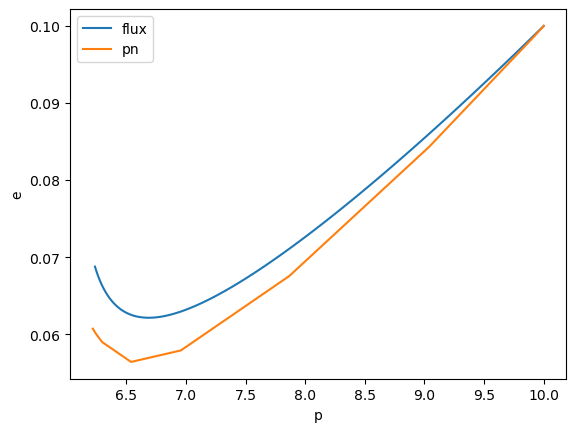

In [34]:
M = 1e6
mu = 1e1
p0 = 10.0
e0 = 0.1
T = 2.0
beta = 0.0
traj = PnTrajectory()

test = traj(M, mu, 0.0, p0, e0, 1.0, beta, T=T, dt=10.0)

traj2 = EMRIInspiral(func="SchwarzEccFlux")

flux = traj2(M, mu, 0.0, p0, e0, 1.0, T=T, dt=10.0)

p = test[1]
e = test[2] 

import matplotlib.pyplot as plt
plt.plot(flux[1], flux[2], label='flux')
plt.plot(p, e, label='pn')
plt.ylabel('e')
plt.xlabel('p')

plt.legend()

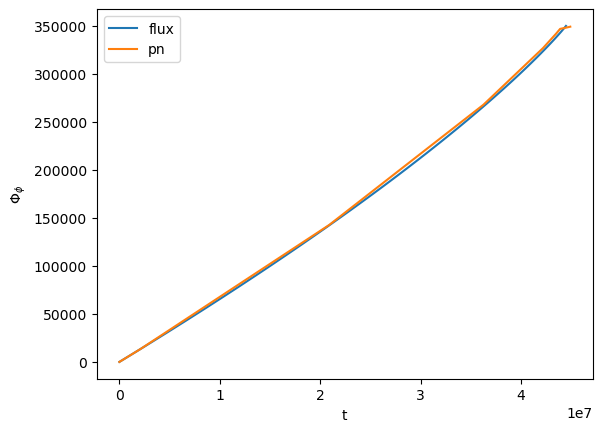

In [35]:
plt.plot(flux[0], flux[4], label='flux')
plt.plot(test[0], test[4], label='pn')
plt.ylabel('$\Phi_\phi$')
plt.xlabel('t')

plt.legend()

### Make a waveform model
Now we will create a waveform with our new trajectory model. To do this, we will start with [SchwarzschildEccentricWaveformBase](https://mikekatz04.github.io/FastEMRIWaveforms/html/user/main.html#few.waveform.SchwarzschildEccentricWaveformBase). This base class has already inherited from [SchwarzschildEccentric](https://mikekatz04.github.io/FastEMRIWaveforms/html/user/main.html#few.utils.baseclasses.SchwarzschildEccentric). It creates the common interface for all waveform modules (and how they interface with there constituent modules). A requirement when creating a module is to have properties describing the GPU capability of the waveform, as well as whether or not it allows for batching the waveform creation (after trajectory).  

In [36]:
class FastSchwarzschildEccentricPn(SchwarzschildEccentricWaveformBase):
    def __init__(
        self,
        inspiral_kwargs={},
        amplitude_kwargs={},
        sum_kwargs={},
        Ylm_kwargs={},
        use_gpu=False,
        *args,
        **kwargs
    ):

        SchwarzschildEccentricWaveformBase.__init__(
            self,
            PnTrajectory,
            RomanAmplitude,
            InterpolatedModeSum,
            inspiral_kwargs=inspiral_kwargs,
            amplitude_kwargs=amplitude_kwargs,
            sum_kwargs=sum_kwargs,
            Ylm_kwargs=Ylm_kwargs,
            use_gpu=use_gpu,
            *args,
            **kwargs
        )

    @property
    def gpu_capability(self):
        return True

    @property
    def allow_batching(self):
        return False

In [37]:
test = FastSchwarzschildEccentricPn()

M = 1e6
mu = 1e1
p0 = 12.0
e0 = 0.4
theta = np.pi/3.
phi = np.pi/4.
dist = 1.0

T = 0.02
dt = 15.0

wave1 = test(M, mu, p0, e0, theta, phi, beta, dist=dist, dt=dt, T=T)

wave2 = few_gen(M, mu, p0, e0, theta, phi, dist=dist, dt=dt, T=T)

mismatch: 0.08059355860184703


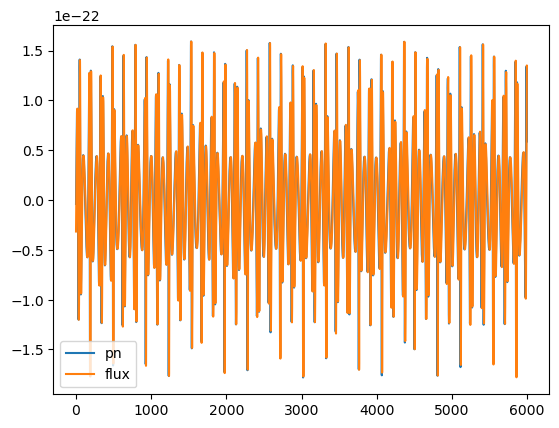

In [38]:
# end of waveform is where we can see the difference
plt.plot(wave1.real[-6000:], label='pn')
plt.plot(wave2.real[-6000:], label='flux')
plt.legend()
print('mismatch:', get_mismatch(wave1, wave2))

## Implement ODE in C/C++

If you want to implement a set of ODE equations in C/C++, you can add your function to `src/ode_base.cc`. You have to create the file if you have not already. Make sure it is in the `src/` directory. When you run `python setup install`, the installer will build a full file of ODEs and take care of all of the backend aspects to the integration. **You only have to implement the ODE**. You identify the ODE functions with `__deriv__` decorator. `#define` is then used to give extra necessary information on the function. Options are:

* `#define {waveform function name}_num_add_args {number of added args}`: Number of additional arguments beyond the required arguments. 
* `#define {waveform function name}_spinless`: Indicated Schwarzschild background. 
* `#define {waveform function name}_circular`: No eccentricity. 
* `#define {waveform function name}_equatorial`: Constrained to equatorial plane.
* `#define {waveform function name}_Y`: Indicates the function is integrated in $Y$ rather than $x_I$. 
* `#define {waveform function name}_file{file number} {file name}`: File names required for proper use of function. 
* `#define {waveform function name}_citation{citation number} {citation name}`: Citations for the function. `citation name` should be the name of the variable the citation is assigned to in `few.utils.citations`.

The `__deriv__` function must be of the form:
````
void {functionname}(double* pdot, double* edot, double* Ydot,
                  double* Omega_phi, double* Omega_theta, double* Omega_r,
                  double epsilon, double a, double p, double e, double Y, double* additional_args)
````
`double*` args, except `additional_args`, represent pointers to doubles representing the output derivative values.
`double` args are input values.
`additional_args` is a pointer to a double array that holds any extra arguments to be included.

#### Analytic functions that do not need storage

If the ODE is purely analytic, a function will work. Here is an example with the 5PN trajectory (see`include/ode_base_example.cc`):

````
#define pn5_Y
#define pn5_citation1 pn5_citation
__deriv__
void pn5(double* pdot, double* edot, double* Ydot,
                  double* Omega_phi, double* Omega_theta, double* Omega_r,
                  double epsilon, double a, double p, double e, double Y, double* additional_args)
{
    // evaluate ODEs

    // the frequency variables are pointers!
    double x = Y_to_xI(a, p, e, Y);
    KerrGeoCoordinateFrequencies(Omega_phi, Omega_theta, Omega_r, a, p, e, x);

	int Nv = 10;
    int ne = 10;
    *pdot = epsilon * dpdt8H_5PNe10 (a, p, e, Y, Nv, ne);

    // needs adjustment for validity
    Nv = 10;
    ne = 8;
	*edot = epsilon * dedt8H_5PNe10 (a, p, e, Y, Nv, ne);

    Nv = 7;
    ne = 10;
    *Ydot = epsilon * dYdt8H_5PNe10 (a, p, e, Y, Nv, ne);

}
````

`#define pn5_y` indicates the function integrates in $Y$ rather than $x_I$.  


#### Functions that require storage

If your function requires the storage of files or interpolants, you can also build your ODE as a class. In this case, 
it must have a constructor, destructor, and method called `deriv_func` with the ODEs.

Here is the implementation for the flux driven trajectory (see`include/ode_base_example.cc`):

````


// Class to carry gsl interpolants for the inspiral data
// also executes inspiral calculations
SchwarzEccFlux::SchwarzEccFlux(std::string few_dir)
{
    interps = new interp_params;

    // prepare the data
    // python will download the data if
    // the user does not have it in the correct place
    load_and_interpolate_flux_data(interps, few_dir);
	//load_and_interpolate_amp_vec_norm_data(&amp_vec_norm_interp, few_dir);
}

#define SchwarzEccFlux_num_add_args 0
#define SchwarzEccFlux_spinless
#define SchwarzEccFlux_equatorial
#define SchwarzEccFlux_file1 FluxNewMinusPNScaled_fixed_y_order.dat
__deriv__
void SchwarzEccFlux::deriv_func(double* pdot, double* edot, double* xdot,
                  double* Omega_phi, double* Omega_theta, double* Omega_r,
                  double epsilon, double a, double p, double e, double x, double* additional_args)
{
    if ((6.0 + 2. * e) > p)
    {
        *pdot = 0.0;
        *edot = 0.0;
        *xdot = 0.0;
        return;
    }

    SchwarzschildGeoCoordinateFrequencies(Omega_phi, Omega_r, p, e);
    *Omega_theta = *Omega_phi;

    double y1 = log((p -2.*e - 2.1));

    // evaluate ODEs, starting with PN contribution, then interpolating over remaining flux contribution

	double yPN = pow((*Omega_phi),2./3.);

	double EdotPN = (96 + 292*Power(e,2) + 37*Power(e,4))/(15.*Power(1 - Power(e,2),3.5)) * pow(yPN, 5);
	double LdotPN = (4*(8 + 7*Power(e,2)))/(5.*Power(-1 + Power(e,2),2)) * pow(yPN, 7./2.);

	double Edot = -epsilon*(interps->Edot->eval(y1, e)*pow(yPN,6.) + EdotPN);

	double Ldot = -epsilon*(interps->Ldot->eval(y1, e)*pow(yPN,9./2.) + LdotPN);

	*pdot = (-2*(Edot*Sqrt((4*Power(e,2) - Power(-2 + p,2))/(3 + Power(e,2) - p))*(3 + Power(e,2) - p)*Power(p,1.5) + Ldot*Power(-4 + p,2)*Sqrt(-3 - Power(e,2) + p)))/(4*Power(e,2) - Power(-6 + p,2));

    // handle e = 0.0
	if (e > 0.)
    {
        *edot = -((Edot*Sqrt((4*Power(e,2) - Power(-2 + p,2))/(3 + Power(e,2) - p))*Power(p,1.5)*
            	  (18 + 2*Power(e,4) - 3*Power(e,2)*(-4 + p) - 9*p + Power(p,2)) +
            	 (-1 + Power(e,2))*Ldot*Sqrt(-3 - Power(e,2) + p)*(12 + 4*Power(e,2) - 8*p + Power(p,2)))/
            	(e*(4*Power(e,2) - Power(-6 + p,2))*p));
    }
    else
    {
        *edot = 0.0;
    }

    *xdot = 0.0;
}

// When interfacing with cython, it helps to have  dealloc function to explicitly call
// rather than the deconstructor
SchwarzEccFlux::~SchwarzEccFlux()
{

    delete interps->Edot;
    delete interps->Ldot;
    delete interps;


}

````

In this case, where the functions are implemented in a class, you will have to add the class to the header file: `include/ode_base.hh`. You do not need to add anything to the header file if you are working with functions and not classes. You will need to create this file if you have not already. Make sure it is in the `include/` directory. Here is an example of what is placed in the header file when working with classes (see `include/ode_base_example.hh`):

````
#include "Interpolant.h"

// Used to pass the interpolants to the ODE solver
struct interp_params{
	double epsilon;
	Interpolant *Edot;
	Interpolant *Ldot;
};

class SchwarzEccFlux{
public:
    interp_params *interps;
    Interpolant *amp_vec_norm_interp;
    double test;

    SchwarzEccFlux(std::string few_dir);

    void deriv_func(double* pdot, double* edot, double* Ydot,
                      double* Omega_phi, double* Omega_theta, double* Omega_r,
                      double epsilon, double a, double p, double e, double Y, double* additional_args);
    ~SchwarzEccFlux();
};

````

## Augmented Analytic Kludge with 5PN trajectory

We have now implemented a new version of the Augmented Analytic Kludge with 5PN trajectories.

Waveforms are generated based on the Augmented Analytic Kludge given in the [EMRI Kludge Suite](https://github.com/alvincjk/EMRI_Kludge_Suite/). However, here the trajectory is vastly improved by employing the 5PN fluxes for generic Kerr orbits from [Fujita & Shibata (2020)](https://arxiv.org/abs/2008.13554). 

The 5PN trajectory produces orbital and phase trajectories. The trajectory is calculated until the orbit reaches within 0.2 of the separatrix, determined from [Stein and Warburton (2020)](https://arxiv.org/abs/1912.07609/). The
fundamental frequencies along the trajectory at each point are then calculated from the orbital parameters and the spin value given by [Schmidt (2002)](https://arxiv.org/abs/gr-qc/0202090>).

These frequencies along the trajectory are then used to map to the frequency basis of the [Analytic Kludge](https://arxiv.org/abs/gr-qc/0310125). This mapping takes the form of time evolving large mass and spin parameters, as
well as the use of phases and frequencies in $\alpha, \Phi, \gamma$:

\begin{align}
\Phi &= \Phi_\phi, \\
\gamma &= \Phi_\phi + \Phi_\theta, \\
\alpha &= \Phi_\phi + \Phi_\theta + \Phi_r. \\
\end{align}


The frequencies in that basis are found by taking the time derivatives
of each equation above.

**Please note:** the 5PN trajectory and AAK waveform take the parameter $Y\equiv\cos{\iota}=L/\sqrt{L^2 + Q}$ rather than $x_I$ as is accepted for relativistic waveforms and in the generic waveform interface discussed above. The generic waveform interface directly converts $x_I$ to $Y$. 

This class has GPU capabilities and works from the sparse trajectory methodoligy with cubic spine interpolation of the smoothly varying waveform quantities. This waveform does not have the freedom in terms of user-chosen quantitites that
`few.waveform.SchwarzschildEccentricWaveformBase` contains. This is mainly due to the specific waveform constructions particular to the AAK/AK.


In [39]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wave_generator = Pn5AAKWaveform(inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=False)

# set initial parameters
M = 1e6
mu = 1e1
a = 0.2
p0 = 14.0
e0 = 0.6
iota0 = 0.1
Y0 = np.cos(iota0)
Phi_phi0 = 0.2
Phi_theta0 = 1.2
Phi_r0 = 0.8


qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = False
dt = 15.0
T = 2.0

waveform = wave_generator(M, mu, a, p0, e0, Y0, qS, phiS, qK, phiK, dist, 
                          Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)

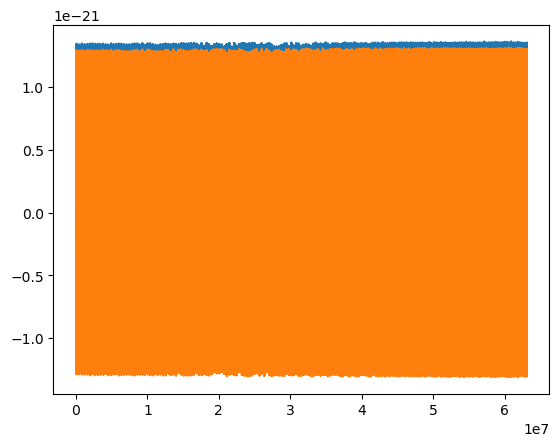

In [40]:
t = np.arange(len(waveform)) * dt
plt.plot(t, waveform.real)
plt.plot(t, waveform.imag)

We can also assume a long-wavelength LISA response by setting `mich=True`. Please note this is not Time-delay interferometry (TDI).

In [41]:
waveform_lw = wave_generator(M, mu, a, p0, e0, Y0, qS, phiS, qK, phiK, dist, mich=True, dt=dt, T=T)

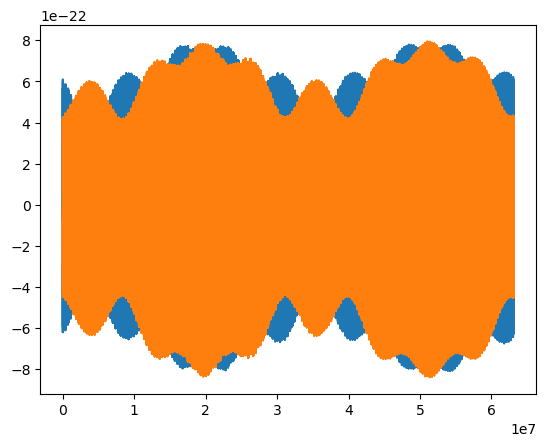

In [42]:
t = np.arange(len(waveform_lw)) * dt
plt.plot(t, waveform_lw.real)
plt.plot(t, waveform_lw.imag)

### 5PN Trajectory

This new waveform includes 5PN trajectories from [Fujita & Shibata 2020](https://arxiv.org/abs/2008.13554).

In [43]:
# initialize trajectory class
traj = EMRIInspiral(func="pn5")

In [44]:
# set initial parameters
M = 1e5
mu = 1e1
a = 0.5
p0 = 14.0
e0 = 0.7
iota0 = 0.1
Y0 = np.cos(iota0)
T = 2.0
Phi_phi0 = 1.0
Phi_theta0 = 2.0
Phi_r0 = 3.0


# run trajectory
t, p, e, Y, Phi_phi, Phi_r, Phi_theta = traj(M, mu, a, p0, e0, Y0, 
                                             Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, T=T)
print(len(p), p.min())

140 4.530565644476762


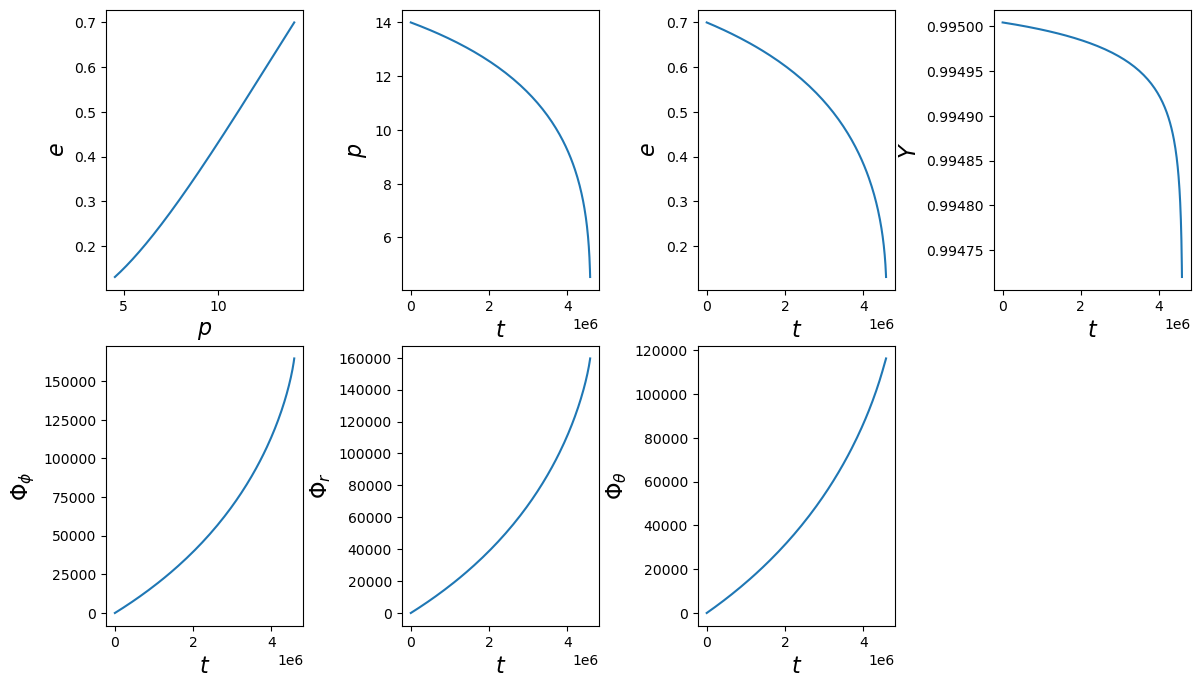

In [45]:
fig, axes = plt.subplots(2, 4)
plt.subplots_adjust(wspace=0.5)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r'$e$', r'$p$', r'$e$', r'$Y$', r'$\Phi_\phi$', r'$\Phi_r$', r'$\Phi_\theta$']
xlabels = [r'$p$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$']
ys = [e, p, e, Y, Phi_phi, Phi_r, Phi_theta]
xs = [p, t, t, t, t, t, t]

for i, (ax, x, y, xlab, ylab) in enumerate(zip(axes, xs, ys, xlabels, ylabels)):
    ax.plot(x, y)
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)
    
axes[-1].set_visible(False)

With the PN trajectory, we need to be careful at smaller $p$, larger $a$, and larger $e$. This trajectory can exihibt pathological behavior near these extremes. Therefore, we provide the option to truncate the trajectory at the Schwarzschild ($a=0$) separatrix, $6 + 2e$. To do this, you provide the keyword `enforce_schwarz_sep=True` to the initialization of the class.

In [46]:
# initialize trajectory class
traj = EMRIInspiral(func="pn5", enforce_schwarz_sep=True)

In [47]:
# set initial parameters
M = 1e5
mu = 1e1
a = 0.5
p0 = 14.0
e0 = 0.7
iota0 = 0.1
Y0 = np.cos(iota0)
T = 2.0
Phi_phi0 = 1.0
Phi_theta0 = 2.0
Phi_r0 = 3.0


# run trajectory
t, p, e, Y, Phi_phi, Phi_r, Phi_theta = traj(M, mu, a, p0, e0, Y0, 
                                             Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, T=T)
print(len(p), p.min())

104 6.549942276116756


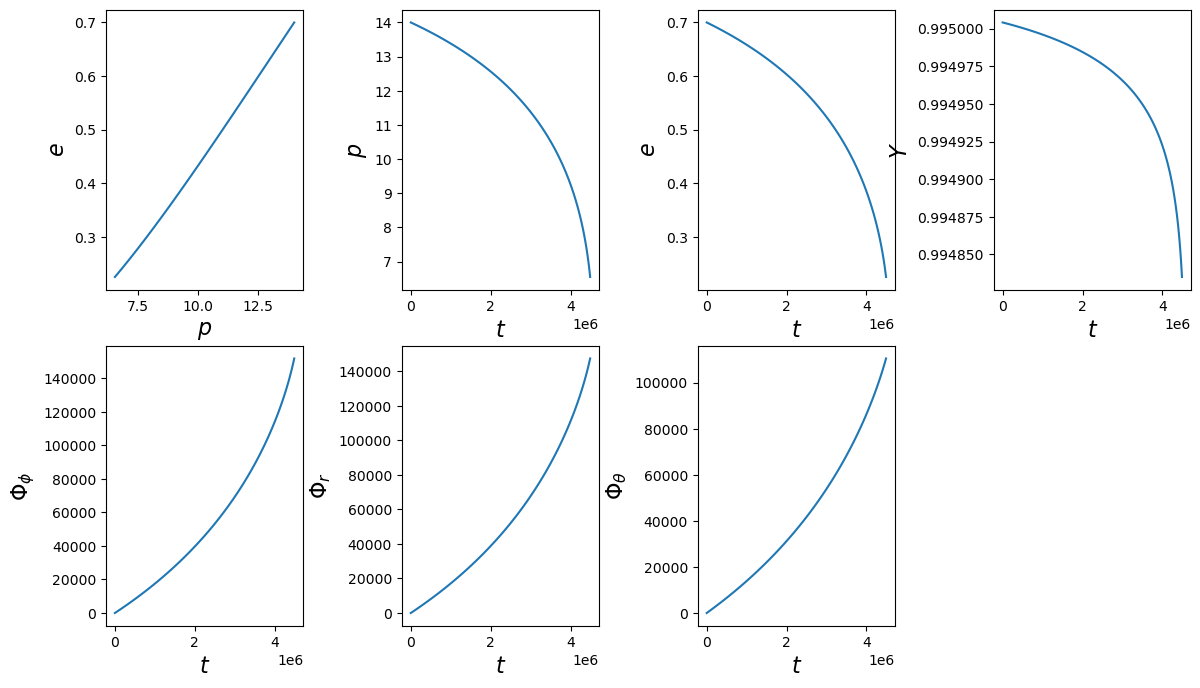

In [48]:
fig, axes = plt.subplots(2, 4)
plt.subplots_adjust(wspace=0.5)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r'$e$', r'$p$', r'$e$', r'$Y$', r'$\Phi_\phi$', r'$\Phi_r$', r'$\Phi_\theta$']
xlabels = [r'$p$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$']
ys = [e, p, e, Y, Phi_phi, Phi_r, Phi_theta]
xs = [p, t, t, t, t, t, t]

for i, (ax, x, y, xlab, ylab) in enumerate(zip(axes, xs, ys, xlabels, ylabels)):
    ax.plot(x, y)
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)
    
axes[-1].set_visible(False)

### Building an AAK waveform from a given trajectory (in this case the 5PN trajectory)

In [49]:
from few.utils.baseclasses import Pn5AAK, ParallelModuleBase

class NewPn5AAKWaveform(AAKWaveformBase, Pn5AAK, ParallelModuleBase):
    def __init__(
        self, inspiral_kwargs={}, sum_kwargs={}, use_gpu=False, num_threads=None
    ):

        inspiral_kwargs["func"] = "pn5"

        AAKWaveformBase.__init__(
            self,
            EMRIInspiral,  # trajectory class
            AAKSummation,
            inspiral_kwargs=inspiral_kwargs,
            sum_kwargs=sum_kwargs,
            use_gpu=use_gpu,
            num_threads=num_threads,
        )

        

In [50]:
# set initial parameters
M = 1e6
mu = 1e1
a = 0.2
p0 = 14.0
e0 = 0.6
iota0 = 0.1
Y0 = np.cos(iota0)
Phi_phi0 = 0.2
Phi_theta0 = 1.2
Phi_r0 = 0.8


qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = False
dt = 15.0
T = 2.0

wave_generator = NewPn5AAKWaveform()
AAK_out = wave_generator(M, mu, a, p0, e0, Y0, qS, phiS, qK, phiK, dist, 
                          Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)

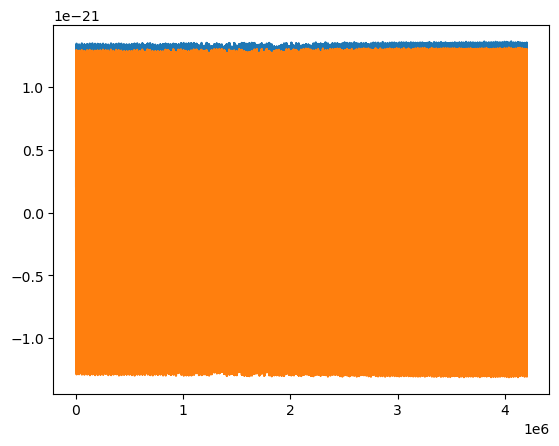

In [51]:
plt.plot(AAK_out.real)
plt.plot(AAK_out.imag)

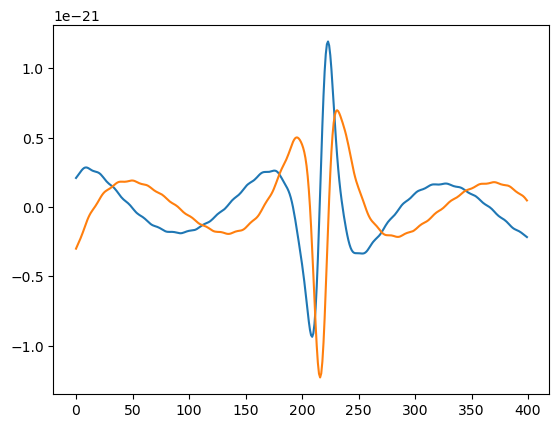

In [52]:
plt.plot(AAK_out.real[:400])
plt.plot(AAK_out.imag[:400])

### Generating the new AAK with the generic waveform generator

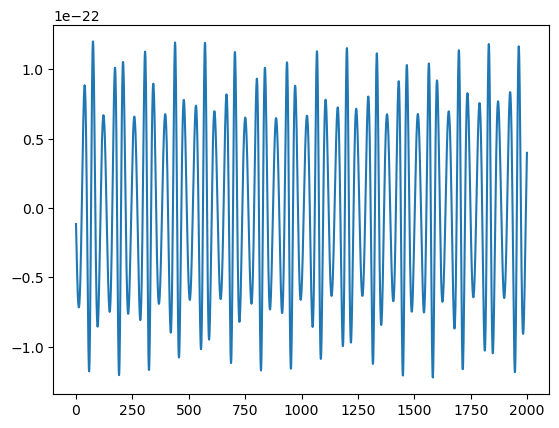

In [53]:
gen_wave = GenerateEMRIWaveform("Pn5AAKWaveform")

# parameters
T = 0.01  # years
dt = 15.0  # seconds
M = 1e6
a = 0.1 
mu = 1e1
p0 = 12.0
e0 = 0.2
x0 = 0.6  # notice this is x_I, not Y. The AAK waveform can convert to Y. 
qK = 0.2  # polar spin angle
phiK = 0.2  # azimuthal viewing angle
qS = 0.3  # polar sky angle
phiS = 0.3  # azimuthal viewing angle
dist = 1.0  # distance
Phi_phi0 = 1.0
Phi_theta0 = 2.0
Phi_r0 = 3.0

h = gen_wave(
    M,
    mu,
    a,
    p0,
    e0,
    x0,
    dist,
    qS,
    phiS,
    qK,
    phiK,
    Phi_phi0,
    Phi_theta0,
    Phi_r0,
    T=T,
    dt=dt,
)

plt.plot(h.real[:2000])

# Additional features

## Mode Selection

The mode selection module is paramount to the computational efficiency of this model. Below we show how we perform this selection operation by moving from a set of amplitudes to only those that contribute. 

### Mode selection by power contribution

In [54]:
# first, lets get amplitudes for a trajectory
traj = EMRIInspiral(func="SchwarzEccFlux")

# parameters
M = 1e5
mu = 1e1
p0 = 10.0
e0 = 0.7
theta = np.pi/3.
phi = np.pi/2.

t, p, e, x, Phi_phi, Phi_theta, Phi_r = traj(M, mu, 0.0, p0, e0, 1.0)

# get amplitudes along trajectory
amp = RomanAmplitude()

teuk_modes = amp(p, e)

# get ylms
ylms = ylm_gen(amp.unique_l, amp.unique_m, theta, phi).copy()[amp.inverse_lm]

# select modes

mode_selector = ModeSelector(amp.m0mask, use_gpu=False)

eps = 1e-5  # tolerance on mode contribution to total power

modeinds = [amp.l_arr, amp.m_arr, amp.n_arr]
(teuk_modes_in, ylms_in, ls, ms, ns) = mode_selector(teuk_modes, ylms, modeinds, eps=eps)

print("We reduced the mode content from {} modes to {} modes.".format(teuk_modes.shape[1], teuk_modes_in.shape[1]))

We reduced the mode content from 3843 modes to 874 modes.


### Specific mode selection

The user can also select a specific set of modes to use in the waveform.

mismatch with full wave: 0.07166765726164526


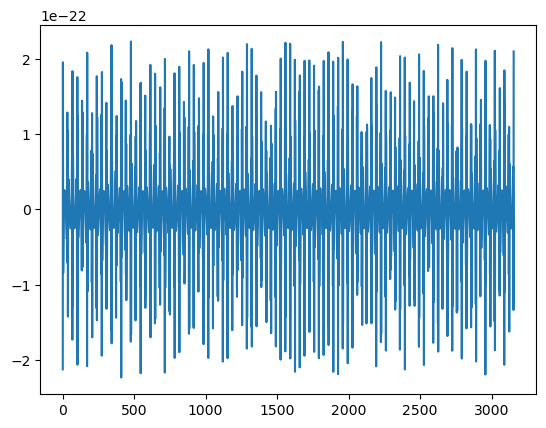

In [55]:
# l = 2, m = 2 wave
specific_modes = [(2, 2, n) for n in range(-30, 31)]
dt = 10.0
dist = 1.0
wave_22 = few(M, mu, p0, e0, theta, phi, dist=1.0, dt=dt, T=0.001, mode_selection=specific_modes)
wave_base = few(M, mu, p0, e0, theta, phi, dist=1.0, dt=dt, T=0.001)

plt.plot(wave_22.real)

print('mismatch with full wave:', get_mismatch(wave_22, wave_base))

### Producing waveforms with the generic interface

Waveforms can also be generated through a generic interface ([GenerateEMRIWaveform](https://mikekatz04.github.io/FastEMRIWaveforms/html/index.html#few.waveform.GenerateEMRIWaveform)) where the specific waveform model is chosen with an argument. This can also be used to produce waveforms in the detector frame used for data analysis. This interface includes all EMRI parameters, including spin and inclination, as well as sky and orientation parameters. When a specific waveform model does not require certain parameters, the parameters will not affect the waveform generation. A detector-frame waveform in this case means $h_+,h_x$ in the SSB-frame. 

In [56]:
gen_wave = GenerateEMRIWaveform("FastSchwarzschildEccentricFlux")

T = 1/12/30/24  # years
dt = 15.0  # seconds

# parameters
# intrinsic
M = 1e6 
a = 0.0  # will be ignored in Schwarzschild waveform
mu = 1e1
p0 = 12.0 # in range [6+2*e0, 16]
e0 = 0.2 #
x0 = 1.0  # will be ignored in Schwarzschild waveform

# extrinsic
qK = 0.2  # polar spin angle
phiK = 0.2  # azimuthal viewing angle
qS = 0.3  # polar sky angle
phiS = 0.4  # azimuthal viewing angle
dist = 1.0  # distance

# initial phases
Phi_phi0 = 1.0 
Phi_theta0 = 2.0 
Phi_r0 = 3.0

h = gen_wave(
    M,
    mu,
    a,
    p0,
    e0,
    x0,
    dist,
    qS,
    phiS,
    qK,
    phiK,
    Phi_phi0,
    Phi_theta0,
    Phi_r0,
    T=T,
    dt=dt,
)

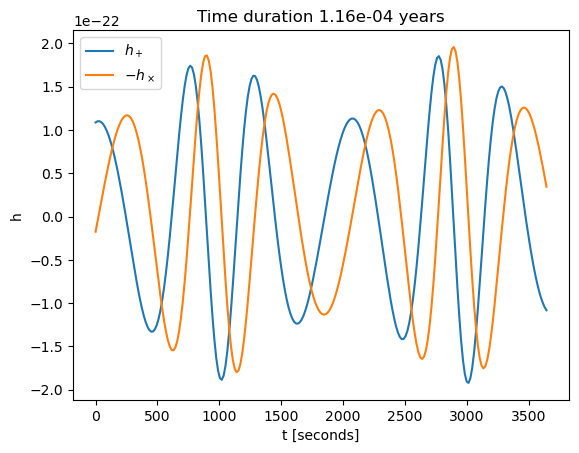

In [57]:
t = np.arange(len(h)) * dt

plt.figure()
plt.title(f'Time duration {T:.2e} years')
plt.plot(t, h.real, label=r'$h_+$')
plt.plot(t, h.imag, label=r'$-h_\times$')
plt.ylabel('h')
plt.xlabel('t [seconds]')
plt.legend()
plt.show()

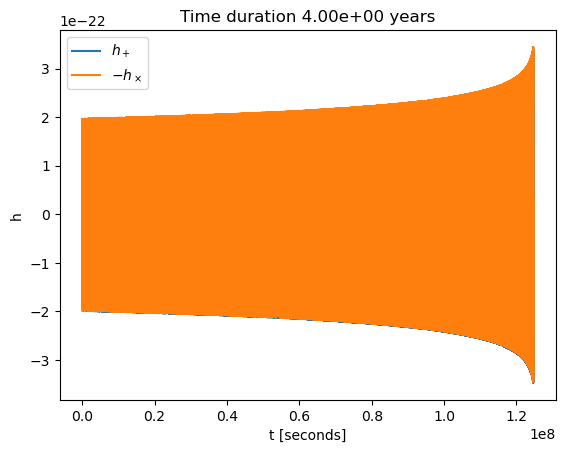

In [58]:
T = 4.0

h = gen_wave(
    M,
    mu,
    a,
    p0,
    e0,
    x0,
    dist,
    qS,
    phiS,
    qK,
    phiK,
    Phi_phi0,
    Phi_theta0,
    Phi_r0,
    T=T,
    dt=dt,)

t = np.arange(len(h)) * dt

plt.figure()
plt.title(f'Time duration {T:.2e} years')
plt.plot(t, h.real, label=r'$h_+$')
plt.plot(t, h.imag, label=r'$-h_\times$')
plt.ylabel('h')
plt.xlabel('t [seconds]')
plt.legend()
plt.show()

## Explore the parameters


100000.0 [3.577329752505046e-18]
237137.37056616554 [3.577329752505046e-18, 3.577004826483748e-18]
562341.3251903491 [3.577329752505046e-18, 3.577004826483748e-18, 3.577083417127196e-18]
1333521.432163324 [3.577329752505046e-18, 3.577004826483748e-18, 3.577083417127196e-18, 3.5771349252280955e-18]
3162277.6601683795 [3.577329752505046e-18, 3.577004826483748e-18, 3.577083417127196e-18, 3.5771349252280955e-18, 3.5771327572085345e-18]


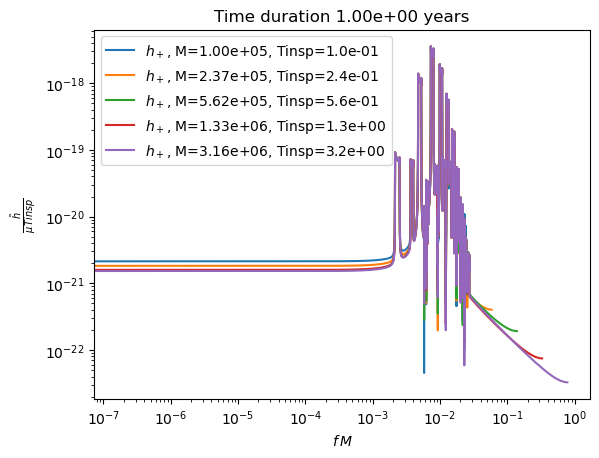

In [59]:
T = 1.0
dt=10
max_FFT = []

plt.figure()
for M in 10**np.linspace(5.0,6.5,num=5):
    mu = 1e-5*M
    Tnew = T*M/1e6
    h = gen_wave(
        M,
        mu,
        a,
        p0,
        e0,
        x0,
        dist,
        qS,
        phiS,
        qK,
        phiK,
        Phi_phi0,
        Phi_theta0,
        Phi_r0,
        T=Tnew,
        dt=dt,)

    t = np.arange(len(h)) * dt


    FFT= np.fft.rfft(h.real)*dt / Tnew /mu
    f= np.linspace(0.0, 1/(2*dt), num=int(len(t)/2)+1 )
    plt.loglog(f *M*MTSUN_SI, np.abs(FFT), label=fr'$h_+$, M={M:.2e}, Tinsp={Tnew:.1e}')
    max_FFT.append(np.max(np.abs(FFT)))
    print(M,max_FFT)
#     plt.plot(t, h.imag, label=r'$-h_\times$')

plt.title(f'Time duration {T:.2e} years')
plt.ylabel(r'$\frac{\tilde{h}}{\mu \, Tinsp}$')
plt.xlabel(r'$f \, M$')
plt.legend()
plt.show()

## Understanding the extrinsic parameters in the Solar System Barycenter frame

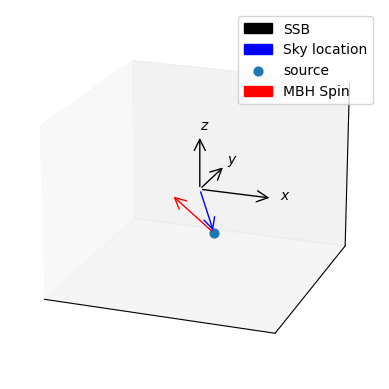

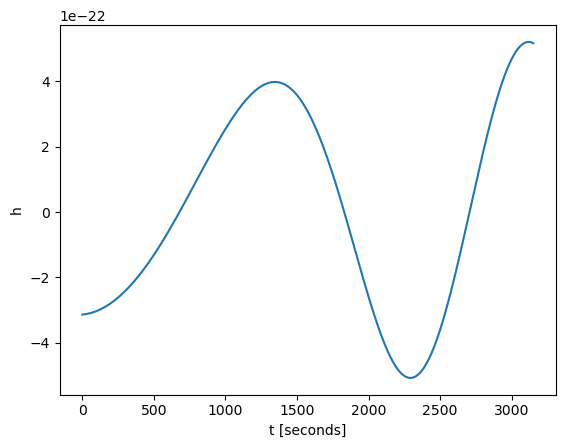

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

# draw the SSB frame
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='->')

a = Arrow3D([0, 1], [0, 0], [0, 0], **arrow_prop_dict, color='k')
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 1], [0, 0], **arrow_prop_dict, color='k')
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 0], [0, 1], **arrow_prop_dict, color='k',label='SSB')
ax.add_artist(a)

ax.text(1.1, 0, 0, r'$x$')
ax.text(0, 1.1, 0, r'$y$')
ax.text(0, 0, 1.1, r'$z$')


# sky direction
qS = np.pi*0.9  # polar sky angle
phiS = 2*np.pi*0.2  # azimuthal viewing angle
th, ph, lab = qS, phiS, 'Sky location'
x_ = np.sin(th) * np.cos(ph)
y_ = np.sin(th) * np.sin(ph)
z_ = np.cos(th)
a = Arrow3D([0, x_], [0, y_], [0, z_], **arrow_prop_dict, color='blue', label=lab)
ax.add_artist(a)
ax.scatter(x_,y_,z_,s=40,label='source')

# sky spin
qK = np.pi*0.2  # polar spin angle
phiK = 2*np.pi*0.6  # azimuthal viewing angle
th, ph, lab = qK, phiK, 'MBH Spin'
x_s = np.sin(th) * np.cos(ph)
y_s = np.sin(th) * np.sin(ph)
z_s = np.cos(th)
a = Arrow3D([x_, x_+x_s], [y_, y_+y_s], [z_, z_+z_s], **arrow_prop_dict, color='red', label=lab)
ax.add_artist(a)

ax.view_init(azim=-70, elev=20)
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
ax.set_zlim([-1.5,1.5])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.legend()
plt.show()

# generate waveform
T = 0.0001
h = gen_wave(
    M,
    mu,
    a,
    p0,
    e0,
    x0,
    dist,
    qS,
    phiS,
    qK,
    phiK,
    Phi_phi0,
    Phi_theta0,
    Phi_r0,
    T=T,
    dt=dt,
)

t = np.arange(len(h)) * dt

plt.figure()
plt.plot(t, h.real)
plt.ylabel('h')
plt.xlabel('t [seconds]')
plt.show()

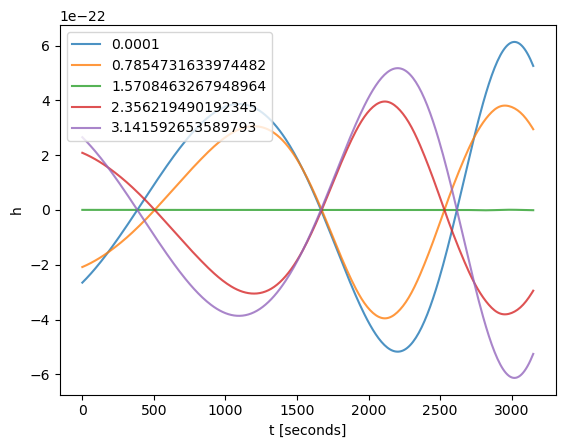

In [61]:
T = 0.0001
plt.figure()
for phase in np.linspace(1e-4, np.pi, num=5):
    h = gen_wave(
        M,
        mu,
        a,
        p0,
        e0,
        x0,
        dist,
        0.0,
        np.pi/3,
        phase,
        np.pi/3,
        Phi_phi0,
        Phi_theta0,
        Phi_r0,
        T=T,
        dt=dt,
    )

    t = np.arange(len(h)) * dt


    plt.plot(t, h.imag, '-', alpha=0.8, label=f'{phase}')
    plt.ylabel('h')
    plt.xlabel('t [seconds]')
    plt.legend()
plt.show()

## Citing waveforms and modules

If you use any work from this package please cite our papers [arxiv.org/2104.04582](https://arxiv.org/abs/2104.04582) and [arxiv.org/2008.06071](https://arxiv.org/abs/2008.06071). Additionally please cite any additional work for each module used by calling the `citation` attribute on the module class:

### Fast Schwarzschild Eccentric Waveforms

In [62]:
wave = FastSchwarzschildEccentricFlux()
print(wave.citation)


@article{Katz:2021yft,
    author = "Katz, Michael L. and Chua, Alvin J. K. and Speri, Lorenzo and Warburton, Niels and Hughes, Scott A.",
    title = "{FastEMRIWaveforms: New tools for millihertz gravitational-wave data analysis}",
    eprint = "2104.04582",
    archivePrefix = "arXiv",
    primaryClass = "gr-qc",
    month = "4",
    year = "2021"
}

@article{Chua:2020stf,
    author = "Chua, Alvin J. K. and Katz, Michael L. and Warburton, Niels and Hughes, Scott A.",
    title = "{Rapid generation of fully relativistic extreme-mass-ratio-inspiral waveform templates for LISA data analysis}",
    eprint = "2008.06071",
    archivePrefix = "arXiv",
    primaryClass = "gr-qc",
    doi = "10.1103/PhysRevLett.126.051102",
    journal = "Phys. Rev. Lett.",
    volume = "126",
    number = "5",
    pages = "051102",
    year = "2021"
}

@software{michael_l_katz_2020_4005001,
  author       = {Michael L. Katz and
                  Alvin J. K. Chua and
                  Niels Warburton and
 

### New and Improved AAK with 5PN Trajectory

In [63]:
wave_aak = Pn5AAKWaveform()
print(wave_aak.citation)


@article{Katz:2021yft,
    author = "Katz, Michael L. and Chua, Alvin J. K. and Speri, Lorenzo and Warburton, Niels and Hughes, Scott A.",
    title = "{FastEMRIWaveforms: New tools for millihertz gravitational-wave data analysis}",
    eprint = "2104.04582",
    archivePrefix = "arXiv",
    primaryClass = "gr-qc",
    month = "4",
    year = "2021"
}

@article{Chua:2020stf,
    author = "Chua, Alvin J. K. and Katz, Michael L. and Warburton, Niels and Hughes, Scott A.",
    title = "{Rapid generation of fully relativistic extreme-mass-ratio-inspiral waveform templates for LISA data analysis}",
    eprint = "2008.06071",
    archivePrefix = "arXiv",
    primaryClass = "gr-qc",
    doi = "10.1103/PhysRevLett.126.051102",
    journal = "Phys. Rev. Lett.",
    volume = "126",
    number = "5",
    pages = "051102",
    year = "2021"
}

@software{michael_l_katz_2020_4005001,
  author       = {Michael L. Katz and
                  Alvin J. K. Chua and
                  Niels Warburton and
 

# Solutions

## Ex 1

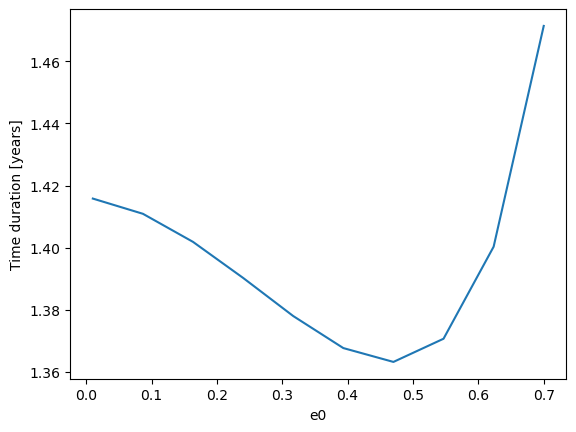

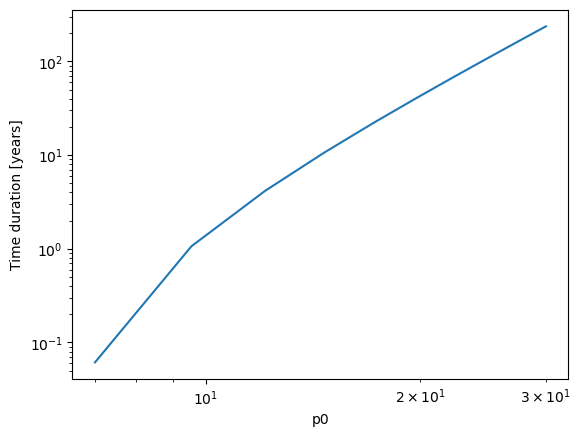

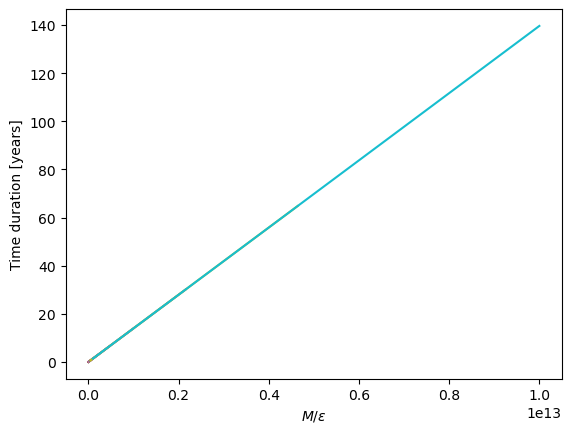

In [64]:
## # set initial parameters
M = 1e6
mu = 1e1
p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0


# Fix time duration to a very large number (100 years) so that we obtain the time duration from trajectory
kwargs = dict(dt=10.0, # initial time setp, 
              T=1000.0,
              err=1e-10 # integrator error
             )

ecc = np.linspace(0.01, 0.7, num=10)

tfinal = []
for e0 in ecc:

    # get secondary mass for fixed mass ratio
    t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                                  Phi_phi0=0.0,
                                                  Phi_theta0=0.0,
                                                  Phi_r0=0.0,
                                                  **kwargs)
    
    tfinal.append(t[-1]/YRSID_SI) 


plt.figure()
plt.plot(ecc, tfinal) 
plt.ylabel('Time duration [years]')
plt.xlabel('e0')
plt.show()
############################
tfinal = []
e0 = 0.0 # reset eccentricity
pp = np.linspace(7.0, 30.0, num=10)
for p0 in pp:

    # get secondary mass for fixed mass ratio
    t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                                  Phi_phi0=0.0,
                                                  Phi_theta0=0.0,
                                                  Phi_r0=0.0,
                                                  **kwargs)
    
    tfinal.append(t[-1]/YRSID_SI) 


plt.figure()
plt.loglog(pp, tfinal) 
plt.ylabel('Time duration [years]')
plt.xlabel('p0')
plt.show()

############################
tfinal = []
e0 = 0.2 # reset
p0=10.0
mass_ratio_vector = 10**np.linspace(-4.0, -6.0, num=10)
Mvec = 10**np.linspace(4.0, 7.0, num=10)

plt.figure()
for M in Mvec:
    tfinal = []
    for epsilon in mass_ratio_vector:

        # get secondary mass for fixed mass ratio
        mu = M * epsilon
        t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                                      Phi_phi0=0.0,
                                                      Phi_theta0=0.0,
                                                      Phi_r0=0.0,
                                                      **kwargs)

        # inspiral duration (divide by YRSID_SI to get it in years)
        tfinal.append(t[-1]/YRSID_SI) 

    plt.plot(M/mass_ratio_vector, tfinal) 
plt.ylabel('Time duration [years]')
plt.xlabel('$M/\epsilon$')
plt.show()




## Ex 2

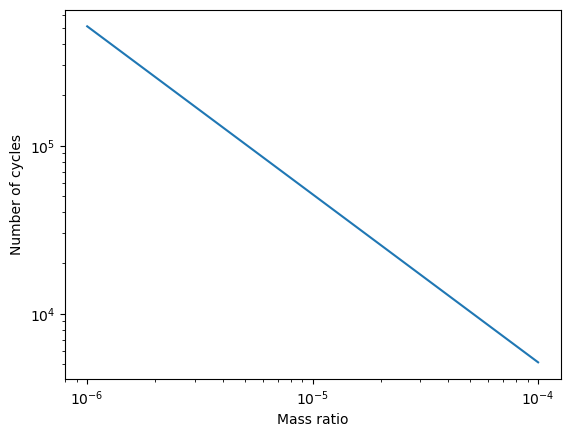

In [65]:
# set initial parameters
M = 1e6
mu = 1e1

# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0
p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

Ncycle = []
for epsilon in mass_ratio_vector:

    # get secondary mass for fixed mass ratio
    mu = M * epsilon
    t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                                  Phi_phi0=0.0,
                                                  Phi_theta0=0.0,
                                                  Phi_r0=0.0,
                                                  **kwargs)
    
    Ncycle.append(Phi_phi[-1]/(2*np.pi)) 
    

plt.figure()
plt.loglog(mass_ratio_vector, Ncycle) 
plt.ylabel('Number of cycles')
plt.xlabel('Mass ratio')
plt.show()

## Ex 3

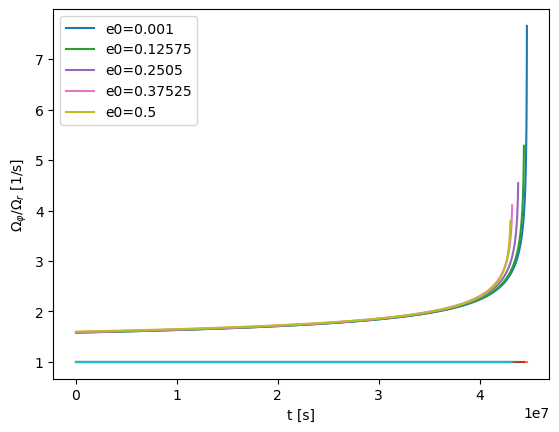

In [66]:
# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0
p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

# set initial parameters
M = 1e6
mu = 1e1
kwargs['T']=400.0
plt.figure()
for e0 in np.linspace(0.001, 0.5,num=5):
    t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                                  Phi_phi0=0.0,
                                                  Phi_theta0=0.0,
                                                  Phi_r0=0.0,
                                                  **kwargs)
    OmegaPhi, OmegaTheta, OmegaR = get_fundamental_frequencies(a, p, e, x)
    # we need to divide by the total Mass and convert to seconds
    plt.plot(t,OmegaPhi /OmegaR , label=f'e0={e0}') 
    plt.plot(t,OmegaPhi /OmegaTheta) 


plt.ylabel(r'$\Omega_\varphi/\Omega_r$ [1/s]')
plt.xlabel('t [s]')
plt.legend()
plt.show()

## Ex 4

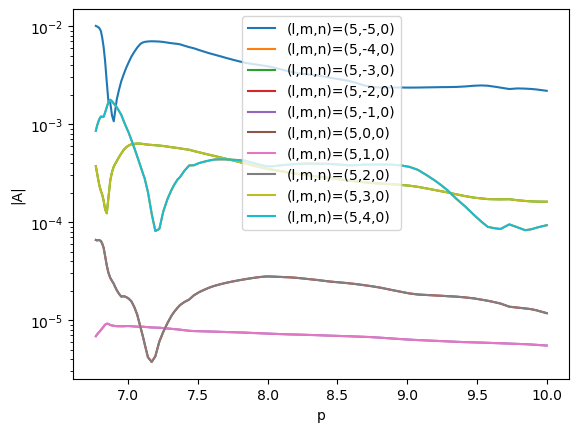

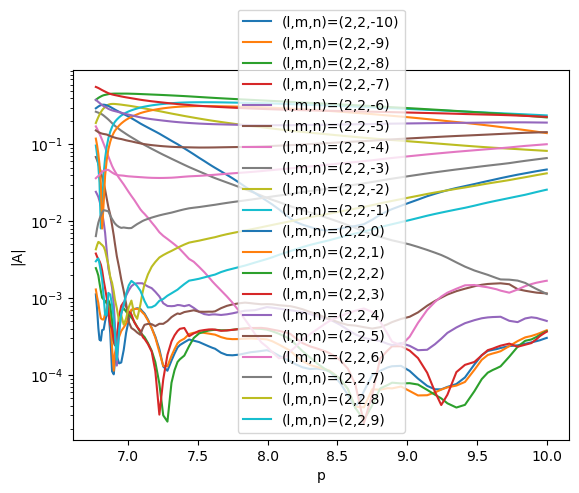

In [70]:
amp = RomanAmplitude()

teuk_modes = amp(p, e)

ll=5
plt.figure()
for mm in range(-ll,ll):
    nn=0
    plt.semilogy(p, np.abs(teuk_modes[:, amp.special_index_map[(ll,mm,nn)]]),label=f'(l,m,n)=({ll},{mm},{nn})')

plt.ylabel('|A|')
plt.xlabel('p')
plt.legend()
plt.show()

plt.figure()
for nn in range(-10,10):
    ll=2
    mm=2
    plt.semilogy(p, np.abs(teuk_modes[:, amp.special_index_map[(ll,mm,nn)]]),label=f'(l,m,n)=({ll},{mm},{nn})')

plt.ylabel('|A|')
plt.xlabel('p')
plt.legend()
plt.show()